# Insurance Claims- Fraud Detection (Evaluation Project-9)

Problem Statement:
    
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Downlaod Files:
    
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# Importing Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
data


months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [3]:
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
data.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

In [5]:
# checking shape
data.shape

(1000, 40)

Observation: Dataset consist of 1000rows and 40 columns.

In [6]:
# checking columns name
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Observation:There are 21 object datatype and 19 are numerical data.
There are 39 column has all NaN datatype and 39 more has non null value.
Policy_bind_date, incident_date are with datetime datatypes,need to split them in terms of date, month and year.

# Changing Date column

In [8]:
data['policy_bind_date']=pd.to_datetime(data['policy_bind_date'])
data['incident_date']=pd.to_datetime(data['incident_date'])

In [9]:
data['policy_bind_day'] = data['policy_bind_date'].dt.day
data['policy_bind_month'] = data['policy_bind_date'].dt.month
data['policy_bind_year'] = data['policy_bind_date'].dt.year


data['incident_day'] = data['incident_date'].dt.day
data['incident_month'] = data['incident_date'].dt.month
data['incident_year'] = data['incident_date'].dt.year


In [10]:
# Drop policy_bind_date and incident_date columns

data.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)


In [11]:
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   3
bodily_injuries                   3
witnesses                   

Observation:Policy_number,incident_location have different values,Insured_zip,incident_year having different values for every entries,so we are dropping these column.


# Dropping Columns

In [12]:
data.drop(["_c39", 'policy_number', 'incident_location','insured_zip', 'incident_year'], axis=1, inplace= True)
data.shape

(1000, 39)

# Checking Duplicates

In [13]:
data.duplicated().sum()

0

Observation: There is no duplicates.

# Statistical Summary

In [14]:
data.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
policy_bind_day              1000.0  1.544800e+01  8.850176e+00        1.00   
policy_bind_month            1000.0  6.559000e+00  3.391758e+00        1.00   
policy_bind_year             1000.0  2.001604e+03  7.360391e+00     1990.00   
incident_day                 1000.0  1.308400e+01  1.044318e+01        1.00   
incident_month               1000.0  3.407000e+00  3.276291e+00        1.00   

                                    25%      50%        75%          max  
months_as_customer             115.7500    199.5    276.250       479.00  
age                             32.0000     38.0     44.000        64.00  
policy_deductable              500.0000   1000.0   2000.000      2000.00  
policy_annual_premium         1089.6075   1257.2   1415.695      2047.59  
umbrella_limit                   0.0000      0.0      0.000  10000000.00  
capital-gains                    0.0000      0.0  51025.000    100500.00  
capital-loss                -51500.0000 -23250.0      0.000         0.00  
incident_hour_of_the_day         6.0000     12.0     17.000        23.00  
number_of_vehicles_involved      1.0000      1.0      3.000         4.00  
bodily_injuries                  0.0000      1.0      2.000         2.00  
witnesses                        1.0000      1.0      2.000         3.00  
total_claim_amount           41812.5000  58055.0  70592.500    114920.00  
injury_claim                  4295.0000   6775.0  11305.000     21450.00  
property_claim                4445.0000   6750.0  10885.000     23670.00  
vehicle_claim                30292.5000  42100.0  50822.500     79560.00  
auto_year                     2000.0000   2005.0   2010.000      2015.00  
policy_bind_day                  8.0000     16.0     23.000        31.00  
policy_bind_month                4.0000      7.0      9.000        12.00  
policy_bind_year              1995.0000   2002.0   2008.000      2015.00  
incident_day                     2.0000     15.0     22.000        31.00  
incident_month                   1.0000      2.0      5.000        12.00

In [15]:
data.describe(include=object).T

count unique                      top freq
policy_state             1000      3                       OH  352
policy_csl               1000      3                  250/500  351
insured_sex              1000      2                   FEMALE  537
insured_education_level  1000      7                       JD  161
insured_occupation       1000     14        machine-op-inspct   93
insured_hobbies          1000     20                  reading   64
insured_relationship     1000      6                own-child  183
incident_type            1000      4  Multi-vehicle Collision  419
collision_type           1000      4           Rear Collision  292
incident_severity        1000      4             Minor Damage  354
authorities_contacted    1000      5                   Police  292
incident_state           1000      7                       NY  262
incident_city            1000      7              Springfield  157
property_damage          1000      3                        ?  360
police_report_available  1000      3                        ?  343
auto_make                1000     14                     Saab   80
auto_model               1000     39                      RAM   43
fraud_reported           1000      2                        N  753

Observation:

Target variable is fraud_reported and it is a categorical data.
   
There are Some '?' is present in dataset.

There is Skewness present in  'auto_year' column and it  means year from which Automobile is operational on road need to convert it into age column. 


# Creating Age column

In [16]:
# Using 2015 as base year 
data['Automobile_Age']=2015 - data['auto_year']

data.drop("auto_year",axis=1,inplace=True)

# Checking for 'whitespace','NA','?' or '-'

In [17]:
data.isin([' ','NA','-']).sum().any()

False

In [18]:
data.isin(['?']).sum().any()

True

In [19]:
data.isin(['?']).sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim      

Observation: There are '?' present in dataset replacing them with np.NaN

In [20]:
data=data.replace('?',np.NaN)

# Checking Null Values

In [21]:
null_val= data.isna().sum()
null_val_per =(null_val/data.shape[0])*100
l= [null_val, null_val_per]
print("missing value details \n\n", pd.concat(l, axis =1, keys =['Null Values', 'Null Values %']).sort_values('Null Values'))


missing value details 

                              Null Values  Null Values %
months_as_customer                     0            0.0
incident_hour_of_the_day               0            0.0
number_of_vehicles_involved            0            0.0
bodily_injuries                        0            0.0
witnesses                              0            0.0
total_claim_amount                     0            0.0
injury_claim                           0            0.0
property_claim                         0            0.0
vehicle_claim                          0            0.0
auto_make                              0            0.0
auto_model                             0            0.0
fraud_reported                         0            0.0
policy_bind_day                        0            0.0
policy_bind_month                      0            0.0
policy_bind_year                       0            0.0
incident_day                           0            0.0
incident_month         

Observation: There are missing values in dataset of object types need to impute.
    There are null values in dataset.

# Imputing Missing Values

In [22]:
data['property_damage'].fillna(data['property_damage'].mode()[0],inplace=True)
data['police_report_available'].fillna(data['police_report_available'].mode()[0],inplace=True)
data['collision_type'].fillna(data['collision_type'].mode()[0],inplace=True)


# Checking missing values after Imputation

<AxesSubplot:>

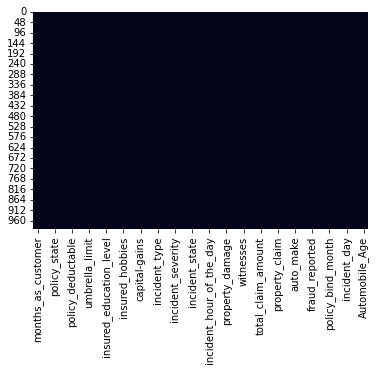

In [23]:
sns.heatmap(data.isnull(),cbar=False)

Observation: Now there is no null value in dataset.

In [24]:
# Exploring combined single limit(policy_csl) column

In [25]:
data['policy_csl'].sample(n=6)

411     250/500
497    500/1000
827     250/500
154     100/300
962    500/1000
616    500/1000
Name: policy_csl, dtype: object

Observation:
    
If the liability coverage on auto policy is written as a combined single limit (CSL), there is no differentiation between bodily injury payouts per person, per accident, or property damage claims.

Here policy_csl have two numerical data separated by '/',split this column into two CSL columns.

In [26]:
data['csl_1st_part']= data.policy_csl.str.split('/',expand=True)[0]
data['csl_2nd_part']= data.policy_csl.str.split('/',expand=True)[1]

# Drop policy_csl column 
data.drop("policy_csl",axis=1,inplace=True)

# Changing type of csl columns

In [27]:
data[['csl_1st_part', 'csl_2nd_part']]= data[['csl_1st_part', 'csl_2nd_part']].astype(int)


# Spliting Categorical and Numerical data

In [28]:
data.columns.to_series().groupby(data.dtypes).groups

{int32: ['csl_1st_part', 'csl_2nd_part'], int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

# Exploratory Data Analysis

Analyzing Categorical Data

In [29]:
cat_features= ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 
               'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 
               'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 
               'property_damage', 'police_report_available', 'auto_make', 'auto_model']
for i in cat_features:
    x= data[i].value_counts()
    print("Value counts of", i, "is---\n",x)
    print("="*20)

Value counts of policy_state is---
 OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
Value counts of insured_sex is---
 FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
Value counts of insured_education_level is---
 JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
Value counts of insured_occupation is---
 machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
Value counts of insured_hobbies is---
 reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55


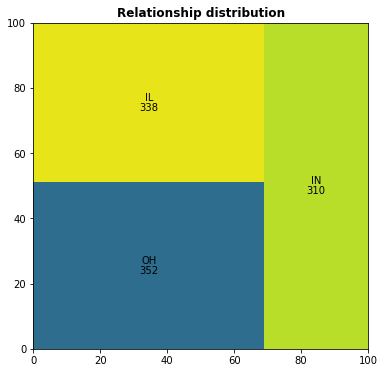

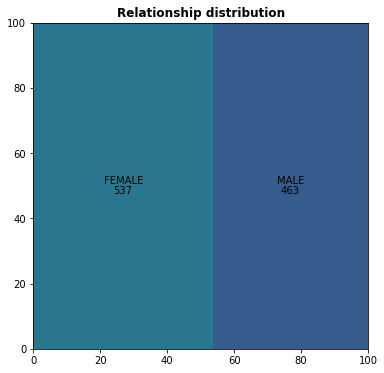

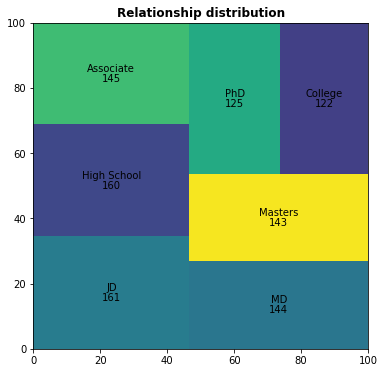

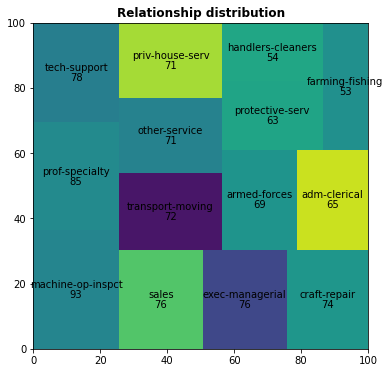

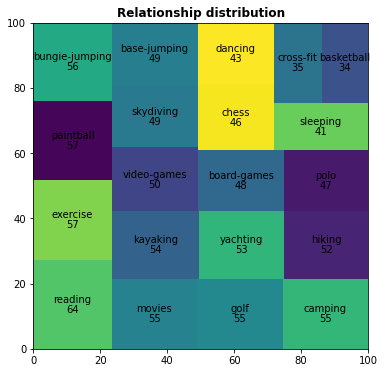

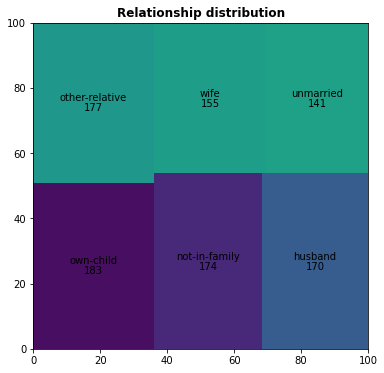

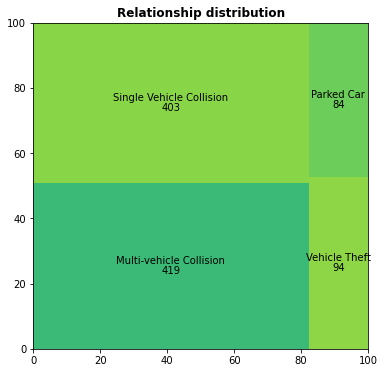

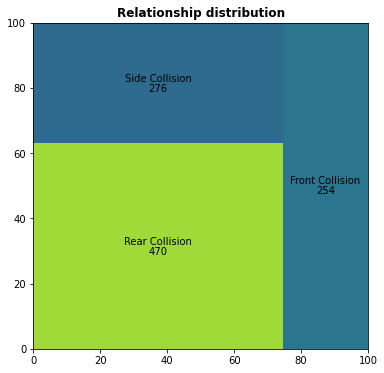

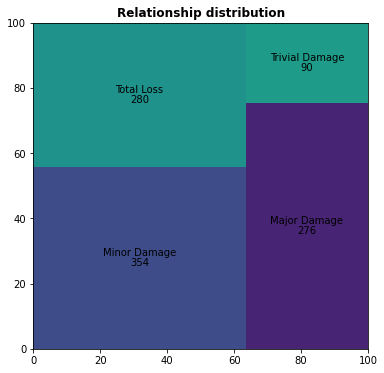

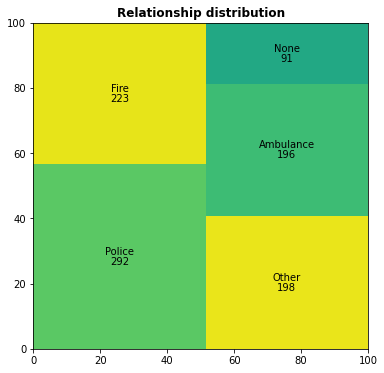

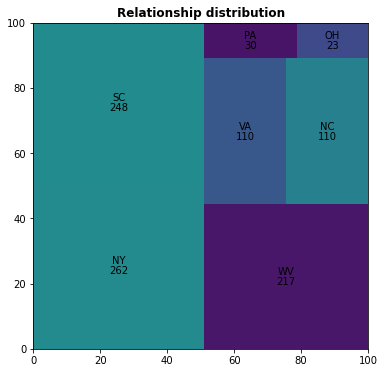

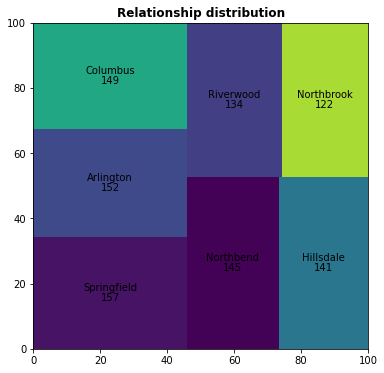

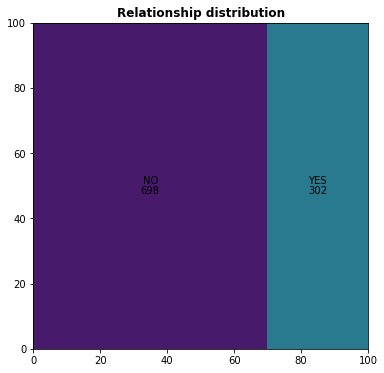

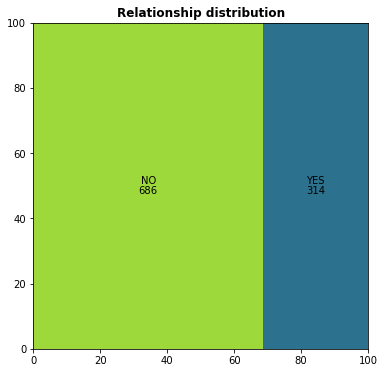

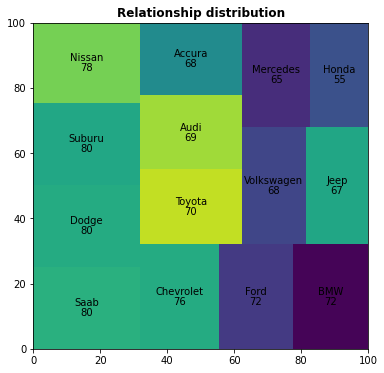

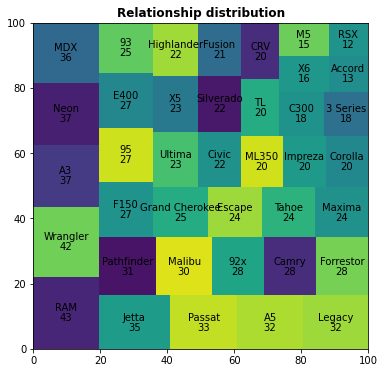

In [30]:
import squarify
for i in cat_features:
    plt.figure(figsize=(6, 6))
    reln = data[i].value_counts()
    squarify.plot(sizes=reln.values, value=reln.values, label=reln.index)
    plt.title('Relationship distribution', fontdict={'fontsize': 12, 'fontweight': 'bold'})
    plt.show()

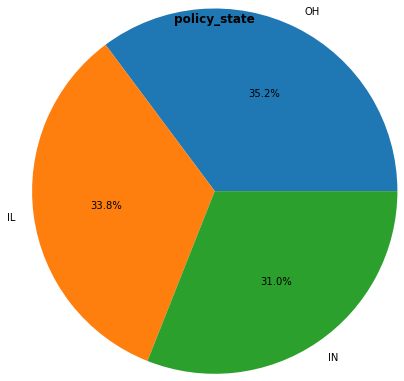

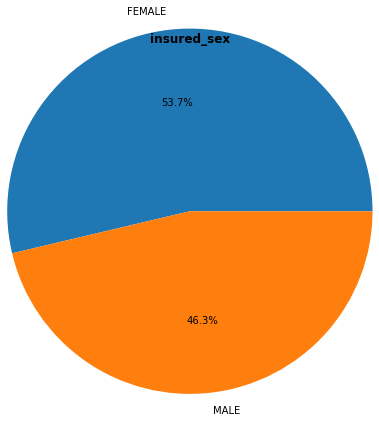

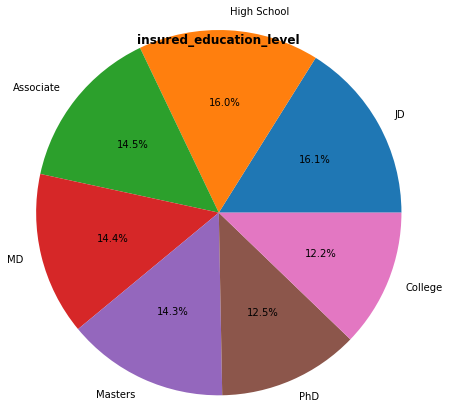

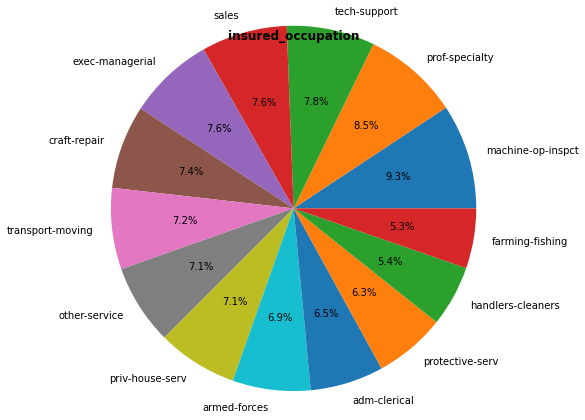

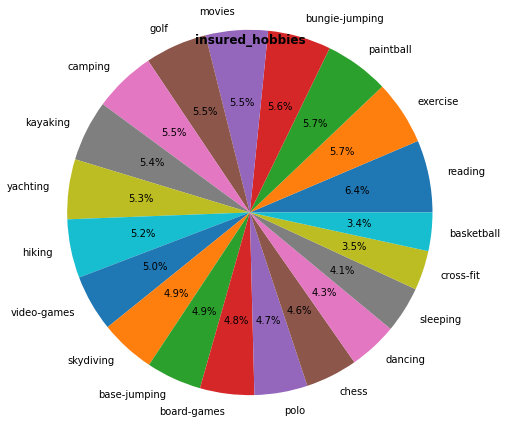

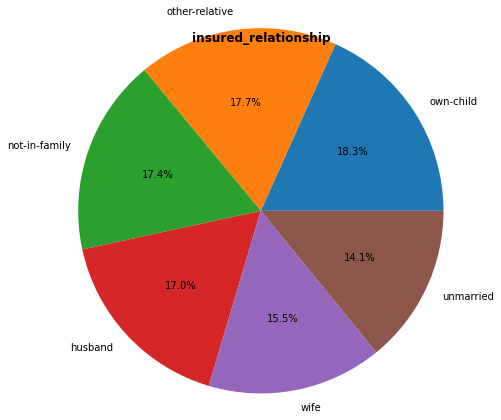

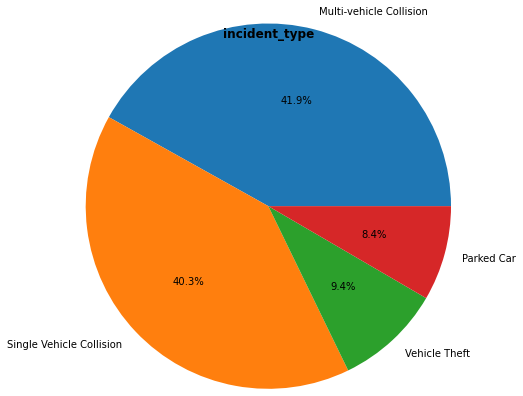

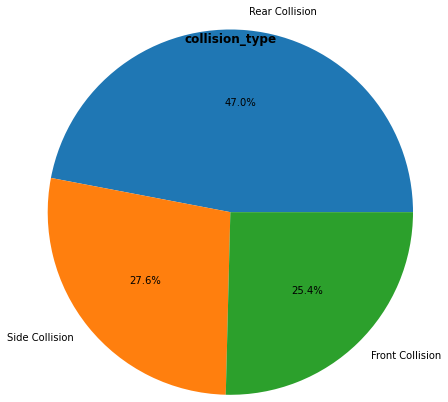

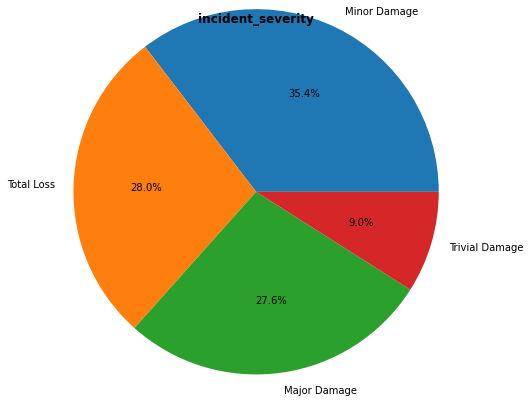

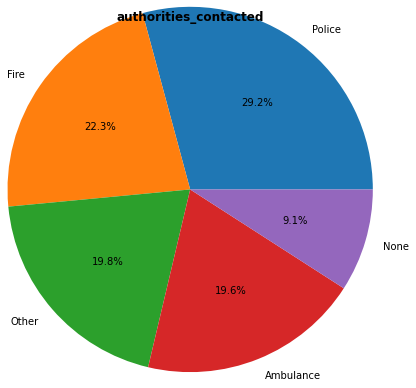

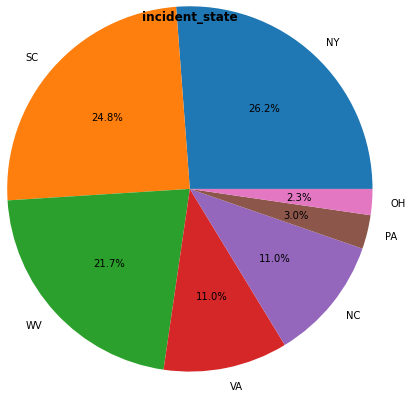

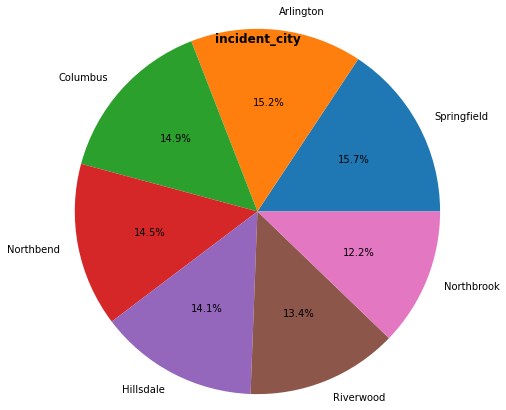

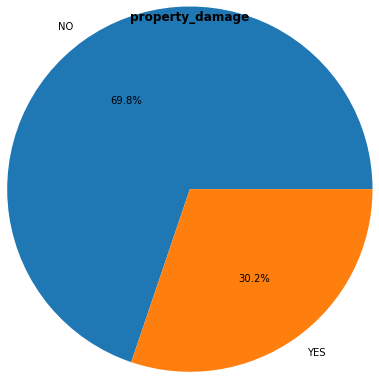

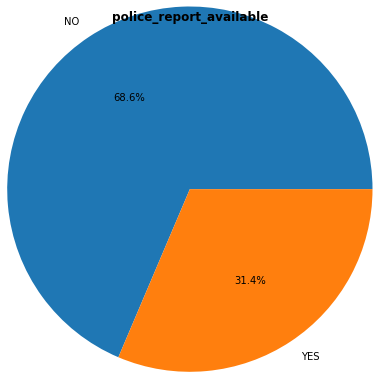

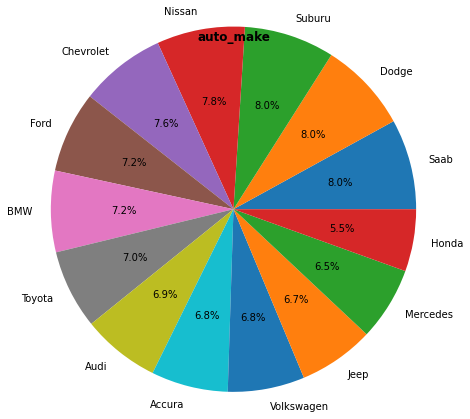

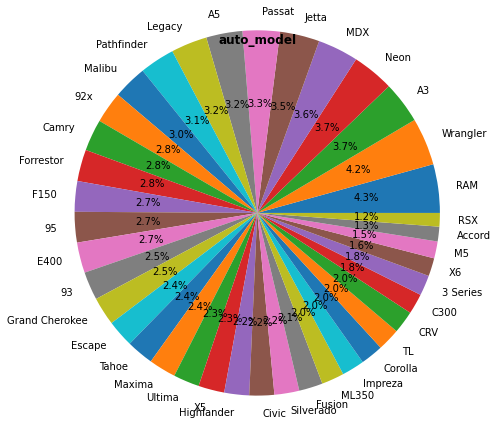

In [31]:
for i in cat_features:
    plt.figure(figsize=(6,6))
    data[i].value_counts().plot.pie(radius =1.4, textprops ={ 'fontsize':10}, autopct='%2.1f%%')
    plt.title(i,fontsize =12,fontweight ='bold')
    plt.ylabel(' ')
    plt.show()

Observation:The three unique value of policy_state are in equal percentage.
Female are more than male.
Multi-vehicle collision or single vehicle collision are the maximum insurance claim type.
Rear collision cases are maximum and maximum accident causes minor damages.
For around 70%, The percentage of no property damaged and no police report available are samei.e. 70%.


# Analyzing Numerical Data

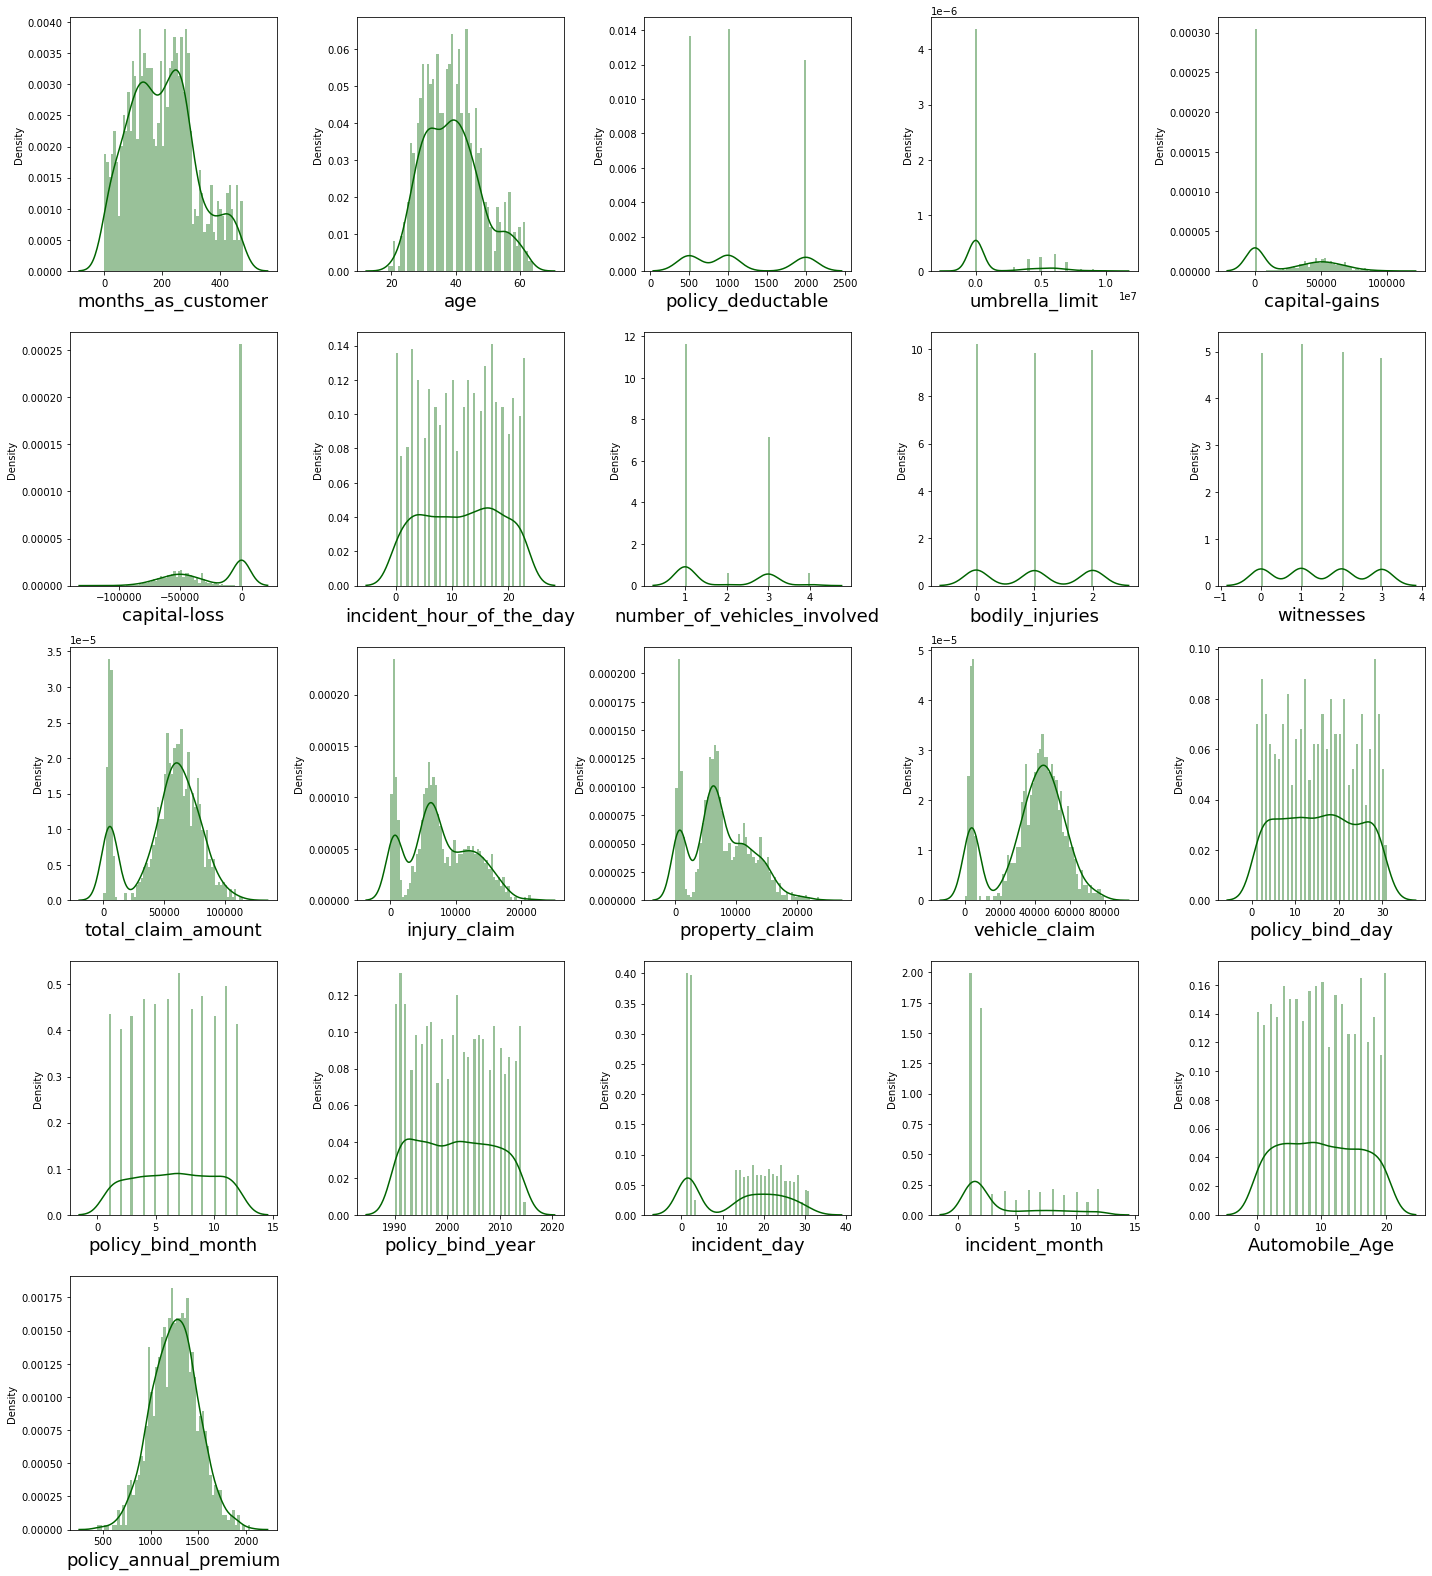

In [32]:
num_features= ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains',
              'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 
              'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 
              'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age', 'policy_annual_premium']

i=0
plt.figure(figsize=(20,22))
for p in num_features:
    plt.subplot(5,5,i+1)
    sns.distplot(data[p],color="darkgreen", bins=60)
    plt.xlabel(p,fontsize=18)
    i+=1  
plt.tight_layout()

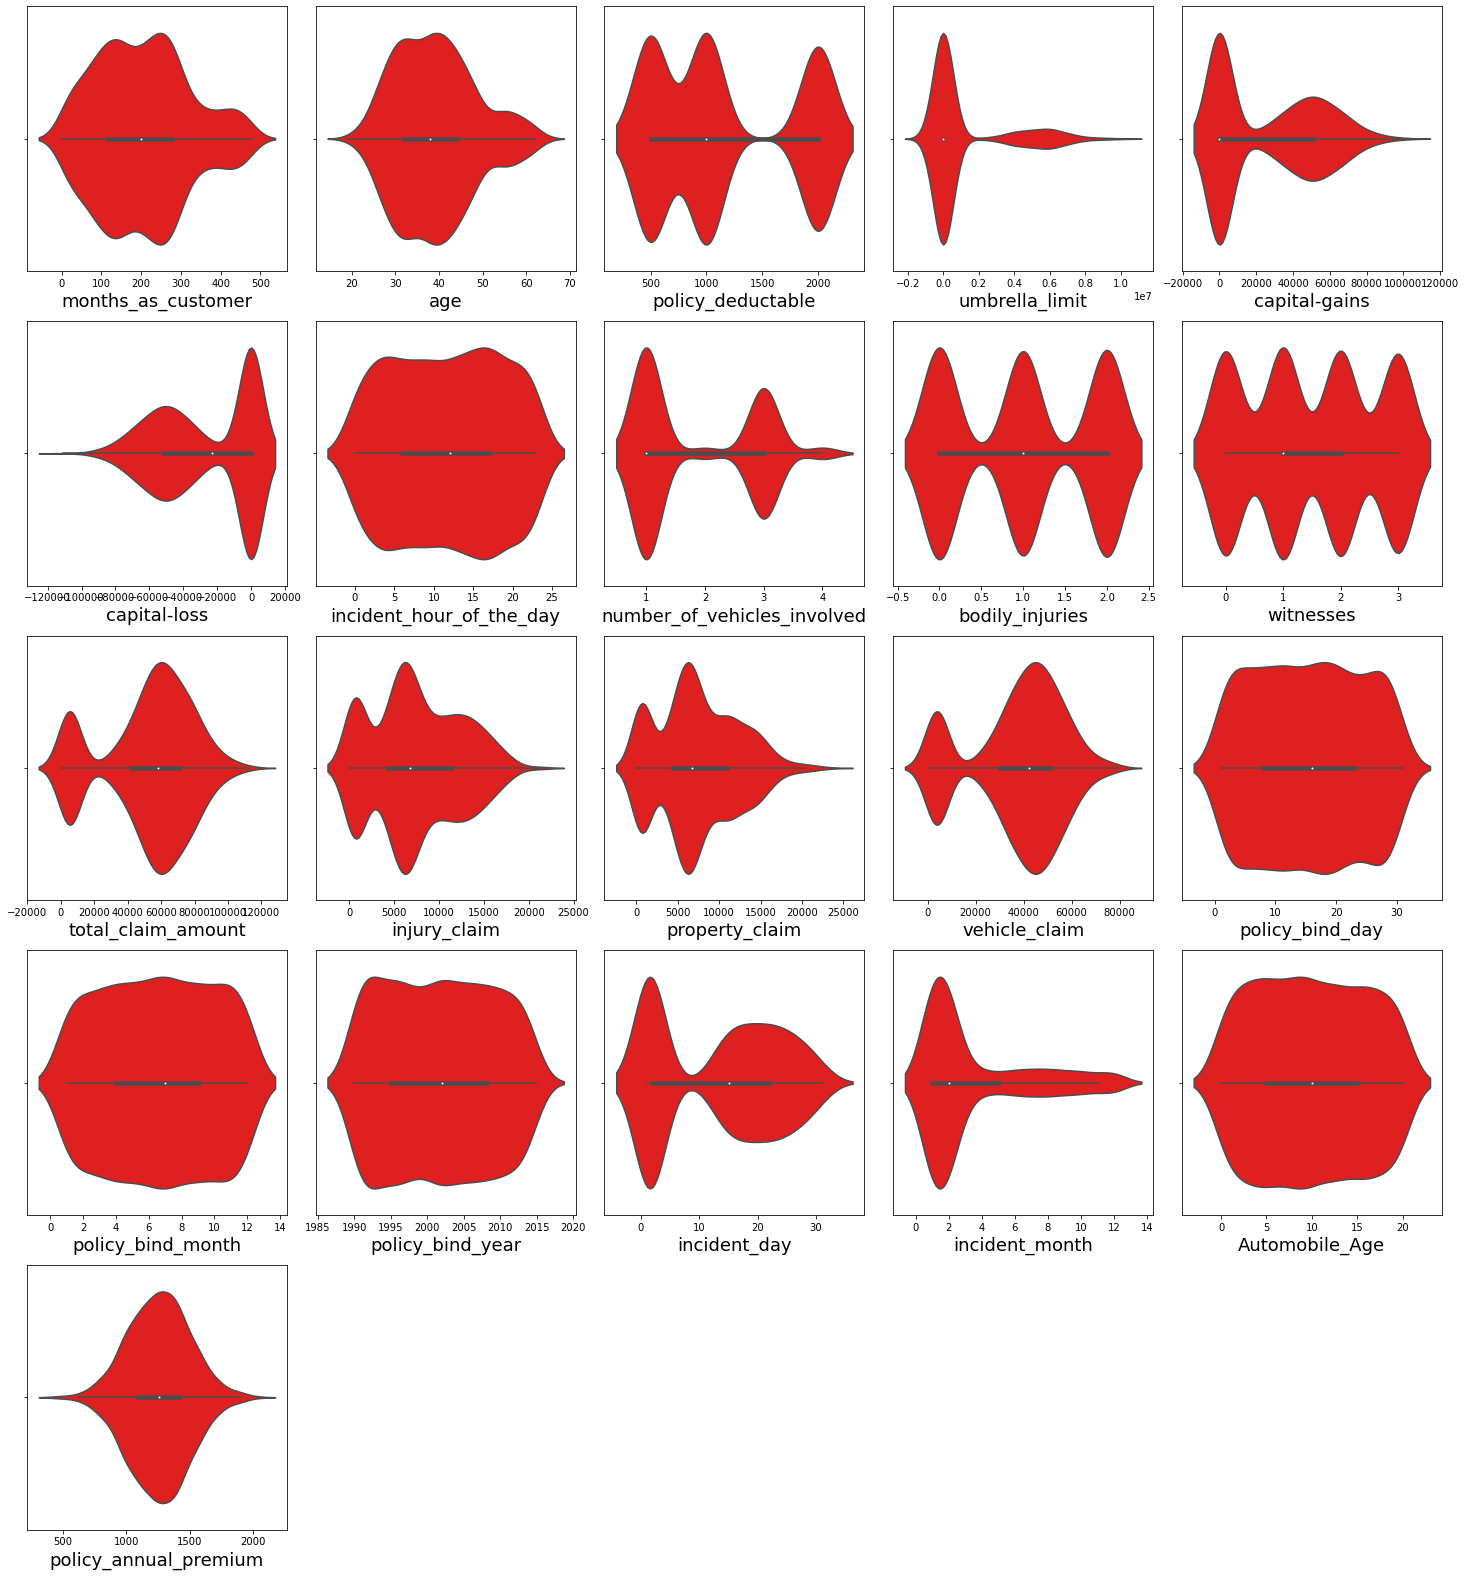

In [33]:
i=0
plt.figure(figsize=(20,22))
for p in num_features:
    plt.subplot(5,5,i+1)
    sns.violinplot(data[p],color="red")
    plt.xlabel(p,fontsize=18)
    i+=1 
plt.tight_layout()
plt.show()

# Exploring Target Variable('fraud_reported')

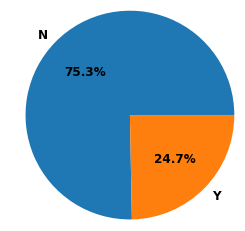

In [34]:
data['fraud_reported'].value_counts().plot.pie(radius =1.2, textprops ={ 'fontsize':12,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.ylabel(' ')
plt.show()

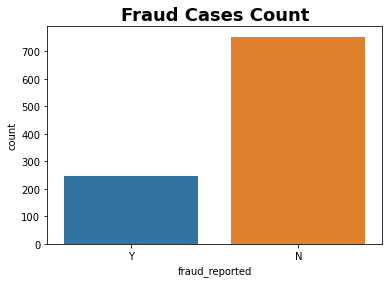

In [35]:
sns.countplot('fraud_reported',data=data)
plt.title('Fraud Cases Count',fontsize=18,fontweight ='bold')
plt.show()

Observation:We can see Dataset is imbalanced.
There are 75% claims which are not fraud.Fraud Claims are 25%.


# Bivariate Analysis

Comparing target with other features

Fraud_reported Vs Months_as_customer

In [36]:
print('Minimum months_as_customer :',data['months_as_customer'].min())
print('Maximum months_as_customer :',data['months_as_customer'].max())

Minimum months_as_customer : 0
Maximum months_as_customer : 479


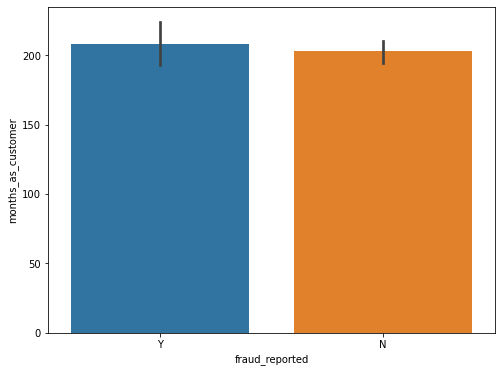

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x = "fraud_reported", y = "months_as_customer", data = data)
plt.show()

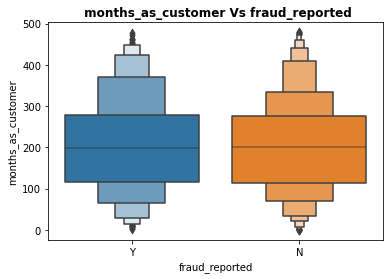

In [38]:
plt.title(' months_as_customer Vs fraud_reported',fontsize=12, fontweight= "bold")
sns.boxenplot(data['fraud_reported'],data["months_as_customer"])
plt.show()

Observation: Months_as_customer is same for fraud_reported wheather its positive or negative.

Fraud_reported Vs Age

In [39]:
print('Minimum age :',data['age'].min())
print('Maximum age :',data['age'].max())
print('Average age :',data['age'].mean())

Minimum age : 19
Maximum age : 64
Average age : 38.948


In [40]:
print('Minimum age :',data['age'].min())
print('Maximum age :',data['age'].max())
print('Average age :',data['age'].mean())

Minimum age : 19
Maximum age : 64
Average age : 38.948


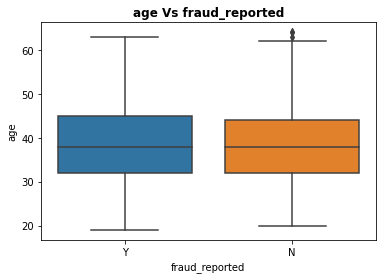

In [41]:
plt.title('age Vs fraud_reported',fontsize=12, fontweight= "bold")
sns.boxplot(data['fraud_reported'],data["age"])
plt.show()

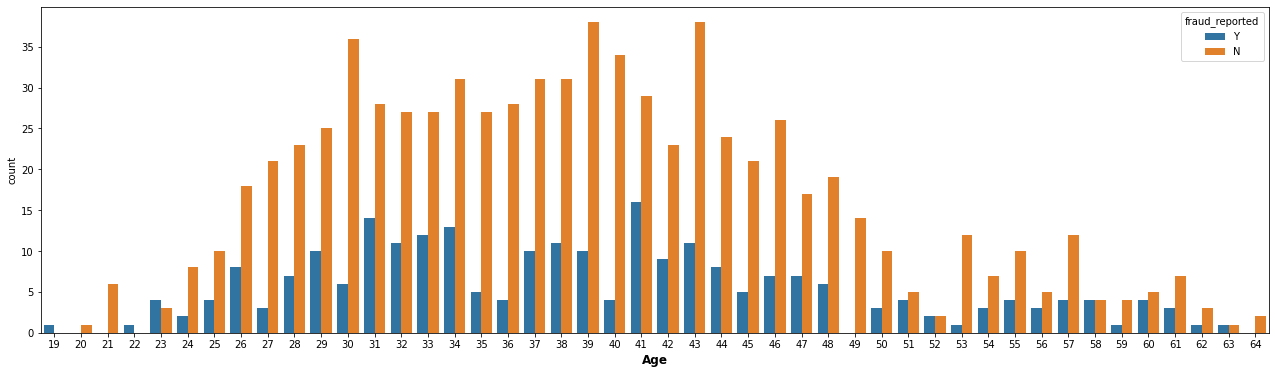

In [42]:
plt.figure(figsize=(22,6))
sns.countplot(x=data['age'], hue=data['fraud_reported'])
plt.xlabel('Age',fontsize=12,fontweight ='bold')
plt.show()

In [43]:
data['age_group'] = pd.cut(data.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])


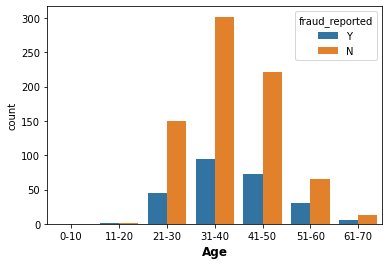

In [44]:
sns.countplot(x=data['age_group'], hue=data['fraud_reported'])
plt.xlabel('Age',fontsize=12,fontweight ='bold')
plt.show()

Observation: fraud_reported positive and negative average age is same.
There are very few cases reported of 11-20 and 60-70 year old people.
Maximum fraud_reported comes from people with age group of 31-50 year.
maximum reported fraud is 41 years old.

Fraud_reported Vs policy_deductable

In [45]:
data['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

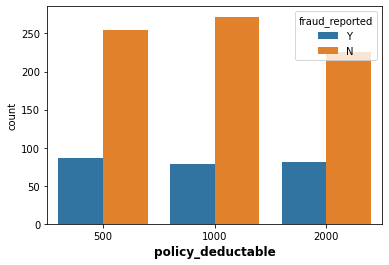

In [46]:
sns.countplot(x=data['policy_deductable'], hue=data['fraud_reported'])
plt.xlabel('policy_deductable',fontsize=12,fontweight ='bold')
plt.show()

In [47]:
pd.crosstab([data.policy_deductable],data["fraud_reported"],margins=True)


fraud_reported       N    Y   All
policy_deductable                
500                255   87   342
1000               272   79   351
2000               226   81   307
All                753  247  1000

Observation:There is no relation between policy_deductable and fraud_reported.

fraud_reported Vs policy_state

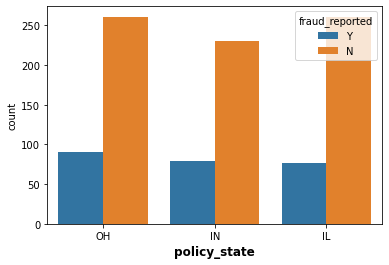

In [48]:
sns.countplot(x=data['policy_state'], hue=data['fraud_reported'])
plt.xlabel('policy_state',fontsize=12,fontweight ='bold')
plt.show()

In [49]:
pd.crosstab([data.policy_state],data["fraud_reported"],margins=True)


fraud_reported    N    Y   All
policy_state                  
IL              261   77   338
IN              231   79   310
OH              261   91   352
All             753  247  1000

Observation:There is no such relation between policy_state and fraud_reported.
There are Maximum fraud comes from state of Ohio.

fraud_reported Vs insured_sex

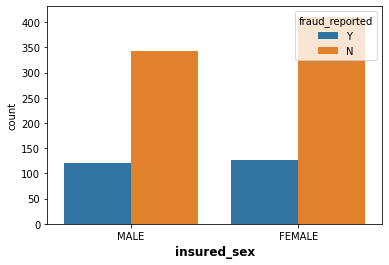

In [50]:
sns.countplot(x=data['insured_sex'], hue=data['fraud_reported'])
plt.xlabel('insured_sex',fontsize=12,fontweight ='bold')
plt.show()

In [51]:
pd.crosstab([data.policy_state, data.insured_sex],data["fraud_reported"],margins=True)


fraud_reported              N    Y   All
policy_state insured_sex                
IL           FEMALE       140   39   179
             MALE         121   38   159
IN           FEMALE       125   38   163
             MALE         106   41   147
OH           FEMALE       146   49   195
             MALE         115   42   157
All                       753  247  1000

Observation: There are same number of cases in both gender.

fraud_reported Vs insured_education_level

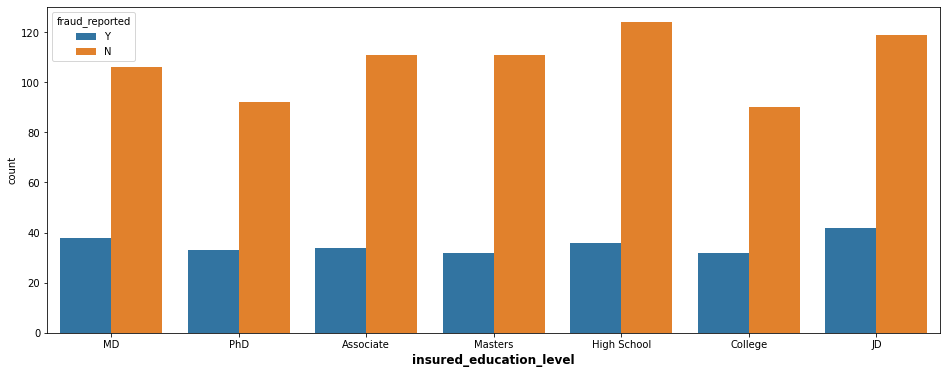

In [52]:
plt.figure(figsize=(16,6))
sns.countplot(x=data['insured_education_level'], hue=data['fraud_reported'])
plt.xlabel('insured_education_level',fontsize=12,fontweight ='bold')
plt.show()

Observation:The tendency of fraud reported across every education backgroud equally, even in Masters and PhD and Max fraud comes from JD.

fraud_reported Vs insured_occupation

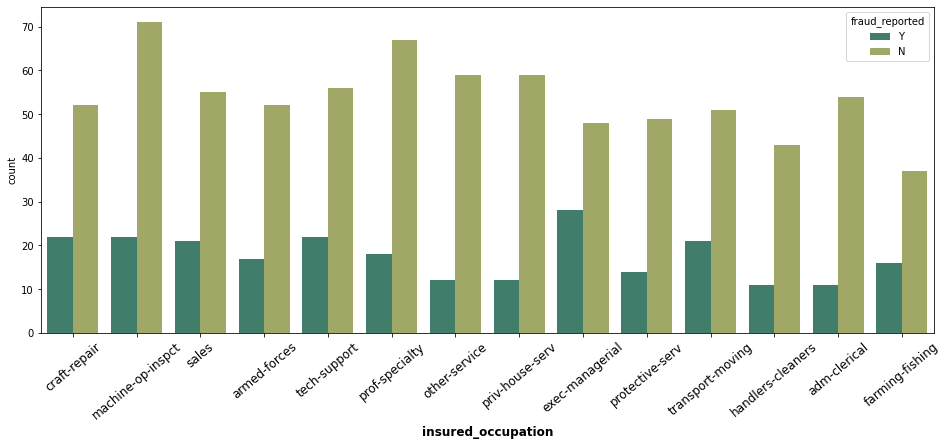

In [53]:
plt.figure(figsize=(16,6))
sns.countplot(x=data['insured_occupation'], hue=data['fraud_reported'], palette = 'gist_earth')
plt.xlabel('insured_occupation',fontsize=12,fontweight ='bold')
plt.xticks(rotation=40,fontsize=12)
plt.show()

In [54]:
pd.crosstab([data.insured_occupation],data["fraud_reported"],margins=True).T


insured_occupation  adm-clerical  armed-forces  craft-repair  exec-managerial  \
fraud_reported                                                                  
N                             54            52            52               48   
Y                             11            17            22               28   
All                           65            69            74               76   

insured_occupation  farming-fishing  handlers-cleaners  machine-op-inspct  \
fraud_reported                                                              
N                                37                 43                 71   
Y                                16                 11                 22   
All                              53                 54                 93   

insured_occupation  other-service  priv-house-serv  prof-specialty  \
fraud_reported                                                       
N                              59               59              67   
Y                              12               12              18   
All                            71               71              85   

insured_occupation  protective-serv  sales  tech-support  transport-moving  \
fraud_reported                                                               
N                                49     55            56                51   
Y                                14     21            22                21   
All                              63     76            78                72   

insured_occupation   All  
fraud_reported            
N                    753  
Y                    247  
All                 1000

Observation:Maximum fraud are from executive managerial occupation.
Minimum fraud are come from as machine-op-inspct occupation.

fraud_reported Vs insured_hobbies

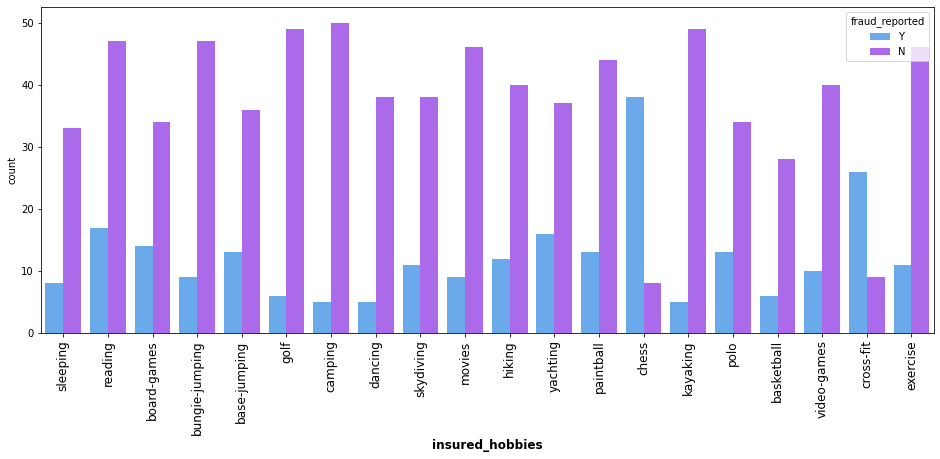

In [55]:
plt.figure(figsize=(16,6))
sns.countplot(x=data['insured_hobbies'], hue=data['fraud_reported'], palette = 'cool')
plt.xlabel('insured_hobbies',fontsize=12,fontweight ='bold')
plt.xticks(rotation=90,fontsize=12)
plt.show()

Maximum frauds are from chess hobbies

fraud_reported Vs insured_relationship

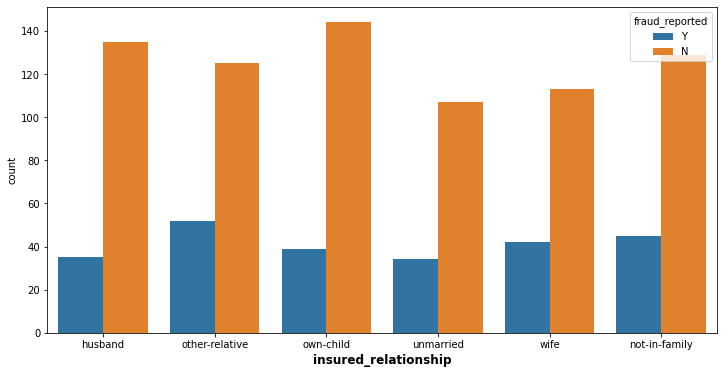

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['insured_relationship'], hue=data['fraud_reported'])
plt.xlabel('insured_relationship',fontsize=12,fontweight ='bold')
plt.show()

Observation:Maximum fraud is from other relatives.
Maximum correct insurance comes from own child relationship

fraud_reported Vs incident_type

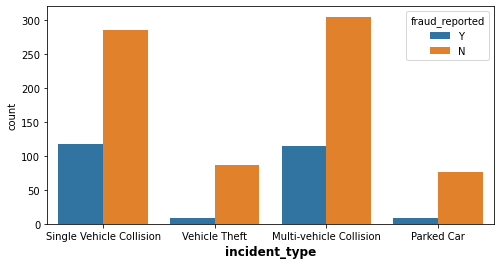

In [57]:
plt.figure(figsize=(8,4))
sns.countplot(x=data['incident_type'], hue=data['fraud_reported'])
plt.xlabel('incident_type',fontsize=12,fontweight ='bold')
plt.show()

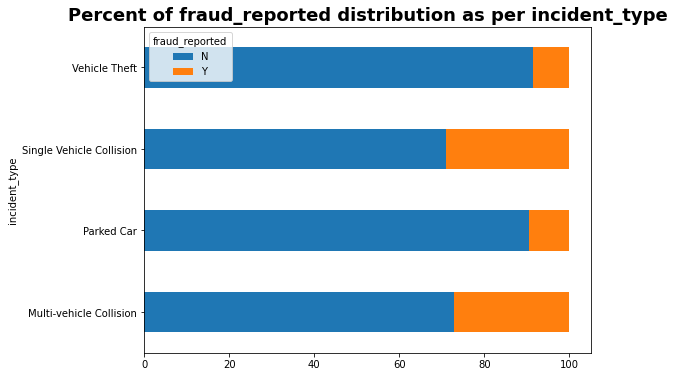

In [58]:
table= pd.crosstab(data['incident_type'], data['fraud_reported'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True, figsize=(8,6))
plt.title('Percent of fraud_reported distribution as per incident_type', fontsize=18, fontweight='bold')
plt.show()

Observation:Minimum fraud cases comes from Vehicle theft and parked car.
Multi vehicle collision cases are real most of the time.

fraud_reported Vs collision_type

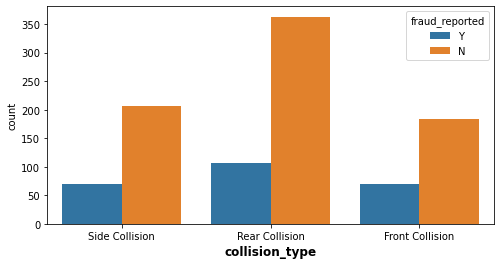

In [59]:
plt.figure(figsize=(8,4))
sns.countplot(x=data['collision_type'], hue=data['fraud_reported'])
plt.xlabel('collision_type',fontsize=12,fontweight ='bold')
plt.show()

In [60]:
pd.crosstab([data.collision_type, data.incident_type],data["fraud_reported"],margins=True).T


collision_type         Front Collision                           \
incident_type  Multi-vehicle Collision Single Vehicle Collision   
fraud_reported                                                    
N                                   87                       97   
Y                                   28                       42   
All                                115                      139   

collision_type          Rear Collision                                      \
incident_type  Multi-vehicle Collision Parked Car Single Vehicle Collision   
fraud_reported                                                               
N                                  103         76                       98   
Y                                   49          8                       42   
All                                152         84                      140   

collision_type                        Side Collision                           \
incident_type  Vehicle Theft Multi-vehicle Collision Single Vehicle Collision   
fraud_reported                                                                  
N                         86                     115                       91   
Y                          8                      37                       33   
All                       94                     152                      124   

collision_type   All  
incident_type         
fraud_reported        
N                753  
Y                247  
All             1000

Observation: Maximum rear collision fraud are reported.

fraud_reported Vs incident_severity

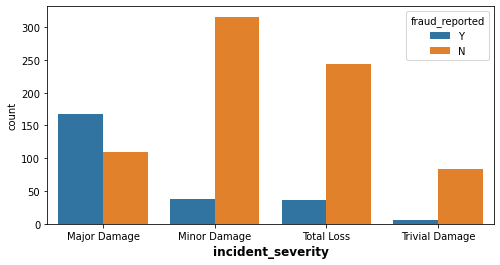

In [61]:
plt.figure(figsize=(8,4))
sns.countplot(x=data['incident_severity'], hue=data['fraud_reported'])
plt.xlabel('incident_severity',fontsize=12,fontweight ='bold')
plt.show()

In [62]:
pd.crosstab([data.incident_type, data.fraud_reported],data["incident_severity"],margins=True)


incident_severity                        Major Damage  Minor Damage  \
incident_type            fraud_reported                               
Multi-vehicle Collision  N                         60           119   
                         Y                         84            11   
Parked Car               N                          0            37   
                         Y                          0             5   
Single Vehicle Collision N                         49           119   
                         Y                         83            17   
Vehicle Theft            N                          0            41   
                         Y                          0             5   
All                                               276           354   

incident_severity                        Total Loss  Trivial Damage   All  
incident_type            fraud_reported                                    
Multi-vehicle Collision  N                      126               0   305  
                         Y                       19               0   114  
Parked Car               N                        0              39    76  
                         Y                        0               3     8  
Single Vehicle Collision N                      118               0   286  
                         Y                       17               0   117  
Vehicle Theft            N                        0              45    86  
                         Y                        0               3     8  
All                                             280              90  1000

In [63]:
pd.crosstab([data.incident_severity],data["collision_type"],margins=True)


collision_type     Front Collision  Rear Collision  Side Collision   All
incident_severity                                                       
Major Damage                    84              96              96   276
Minor Damage                    81             188              85   354
Total Loss                      89              96              95   280
Trivial Damage                   0              90               0    90
All                            254             470             276  1000

In [64]:
pd.crosstab([data.incident_severity],data["fraud_reported"],margins=True)


fraud_reported       N    Y   All
incident_severity                
Major Damage       109  167   276
Minor Damage       316   38   354
Total Loss         244   36   280
Trivial Damage      84    6    90
All                753  247  1000

Observation:Trivial damage cases are rarely fraud cases and rear collision is biggest reason for trivial damage.
In minor damage cases only 31% cases are not fraud.
In trivial Damage is for Parked Car and Vehicle Theft and among them only 6 are fraud case(fraud_reported= Yes)

fraud_reported Vs authorities

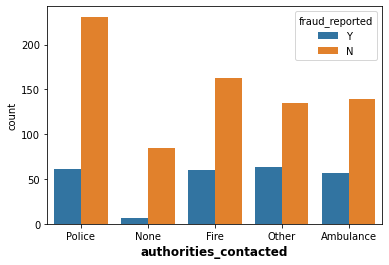

In [65]:
sns.countplot(x=data['authorities_contacted'], hue=data['fraud_reported'])
plt.xlabel('authorities_contacted',fontsize=12,fontweight ='bold')
plt.show()

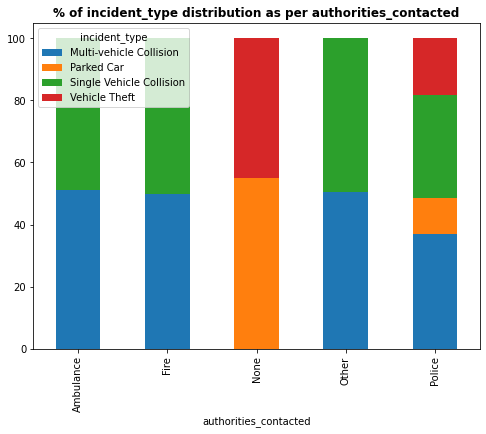

In [66]:
table= pd.crosstab(data['authorities_contacted'], data['incident_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True, figsize=(8,6))
plt.title('% of incident_type distribution as per authorities_contacted', fontsize=12, fontweight='bold')
plt.show()

fraud_reported Vs incident_state

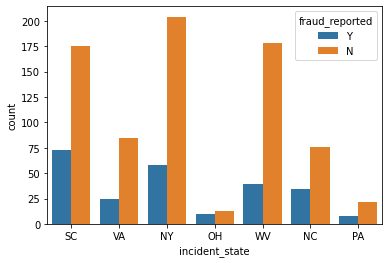

In [67]:
sns.countplot(x=data['incident_state'], hue=data['fraud_reported'])
plt.show()

Observation: Maximum true cases reported from newyork city.

fraud_reported Vs incident_city

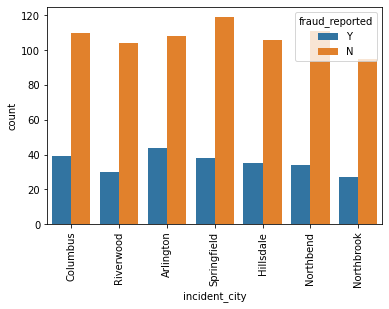

In [68]:
sns.countplot(x=data['incident_city'], hue=data['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

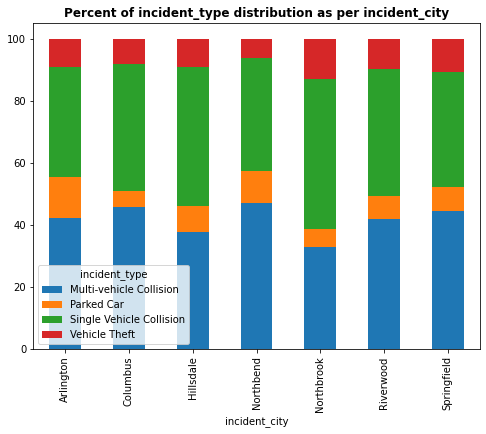

In [69]:
table= pd.crosstab(data['incident_city'], data['incident_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True, figsize=(8,6))
plt.title('Percent of incident_type distribution as per incident_city', fontsize=12, fontweight='bold')
plt.show()

fraud_reported Vs property_damage

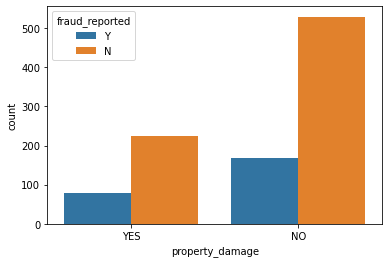

In [70]:
sns.countplot(x=data['property_damage'], hue=data['fraud_reported'])
plt.show()

Observation: Arlington city has maximum fraud cases reported.
Maximum theft of vehicle cases reported in Northbrook state

fraud_reported Vs police_report_available

In [71]:
pd.crosstab([data.police_report_available],data["fraud_reported"],margins=True)


fraud_reported             N    Y   All
police_report_available                
NO                       511  175   686
YES                      242   72   314
All                      753  247  1000

There is no relation or observation between them.

fraud_report Vs auto_make

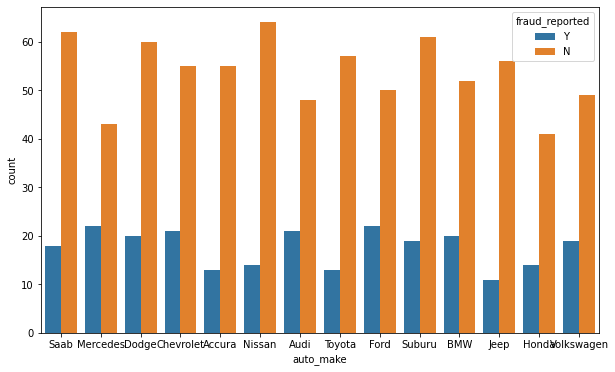

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['auto_make'], hue=data['fraud_reported'])
plt.show()

fraud_reported Vs auto_model

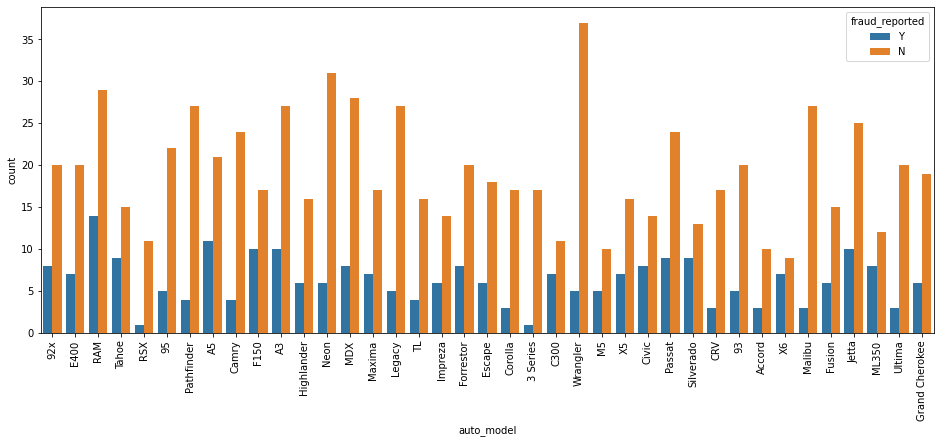

In [73]:
plt.figure(figsize=(16,6))
sns.countplot(x=data['auto_model'], hue=data['fraud_reported'])
plt.xticks(rotation=90)
plt.show()

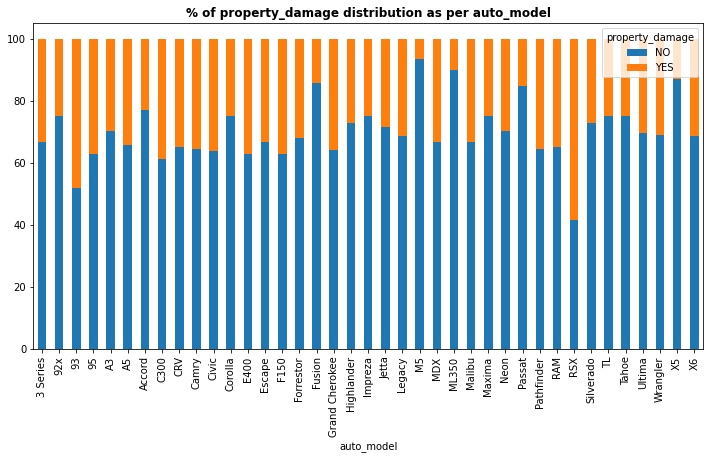

In [74]:
table= pd.crosstab(data['auto_model'], data['property_damage'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True, figsize=(12,6))
plt.title('% of property_damage distribution as per auto_model', fontsize=12, fontweight='bold')
plt.show()

Observation: Wrangler reported for true insurance case most of the time.
RAM model rteported maximum fraud.
Minimum property_damage is for MS model.
Maximum property_damage is for RSX model.

fraud_reported Vs policy bind day, policy bind month, incident hour, number of vehicles involved, bodily injuries and witnesses 

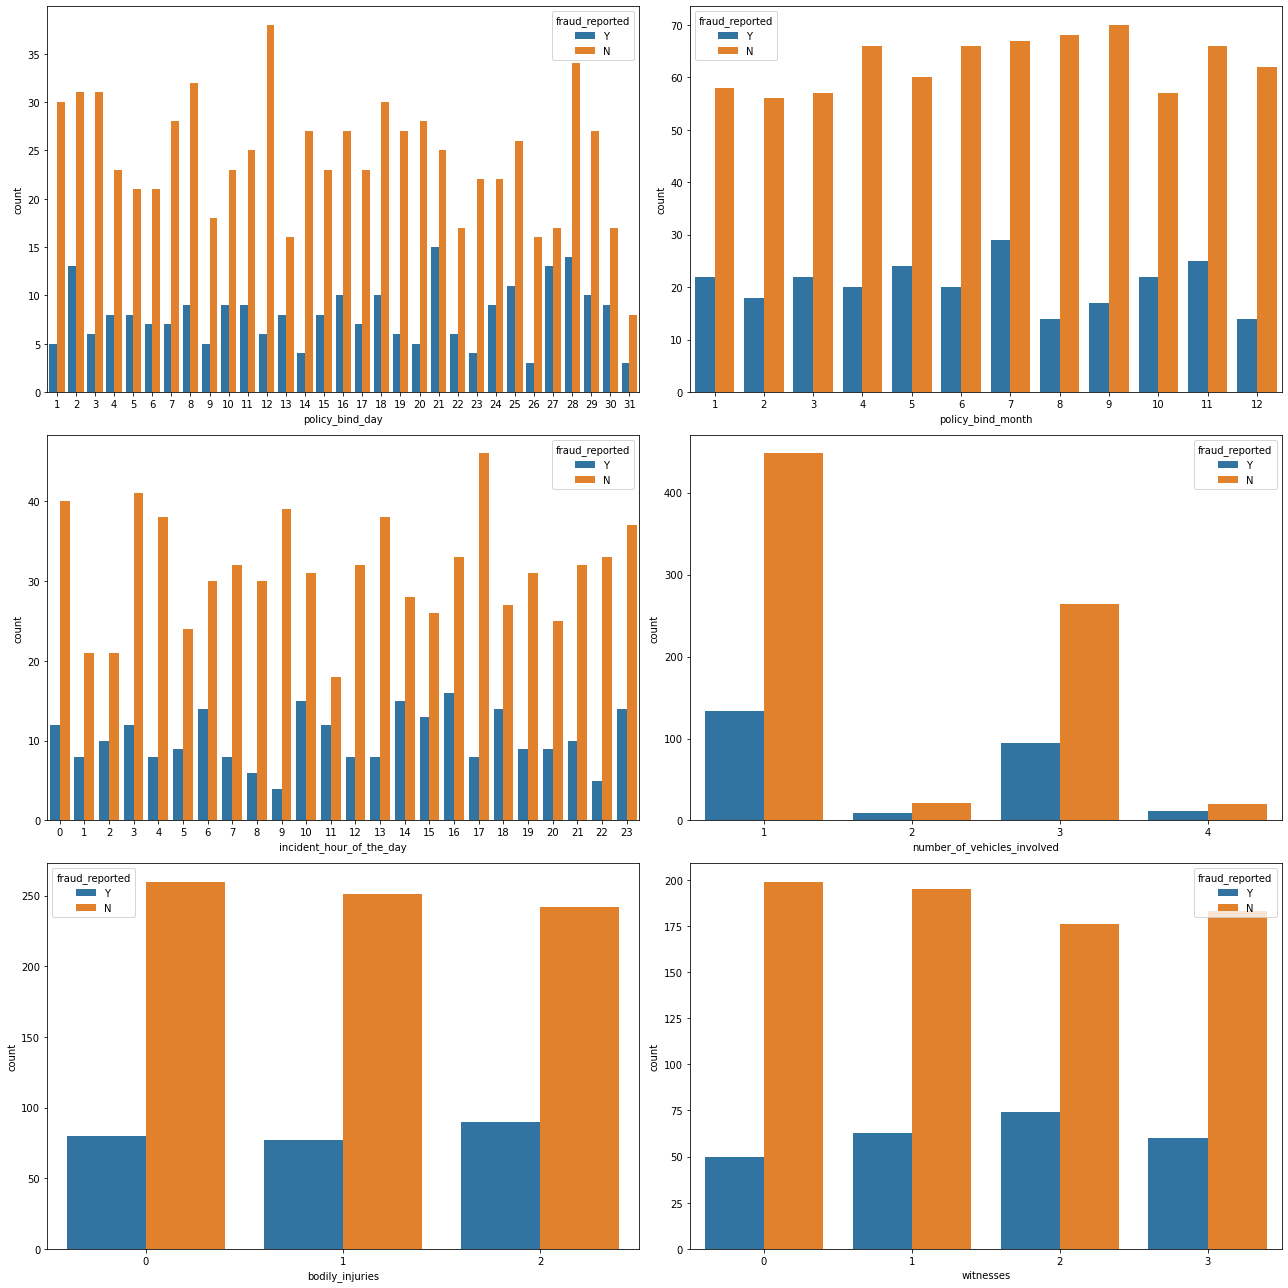

In [75]:
fig,axes=plt.subplots(3,2,figsize=(18,18))

sns.countplot('policy_bind_day',hue="fraud_reported", data= data, ax=axes[0,0])
sns.countplot('policy_bind_month',hue="fraud_reported", data= data, ax=axes[0,1] )
sns.countplot('incident_hour_of_the_day',hue="fraud_reported", data= data, ax=axes[1,0] )
sns.countplot('number_of_vehicles_involved',hue="fraud_reported", data= data, ax=axes[1,1] )
sns.countplot('bodily_injuries',hue="fraud_reported", data= data, ax=axes[2,0])
sns.countplot('witnesses',hue="fraud_reported", data= data, ax=axes[2,1])

plt.tight_layout()
plt.show()

Observation: In the month of july maximum fraud reported on 2ist of month.

fraud_reported Vs policy bind year, incident day, incident month, Automobile Age

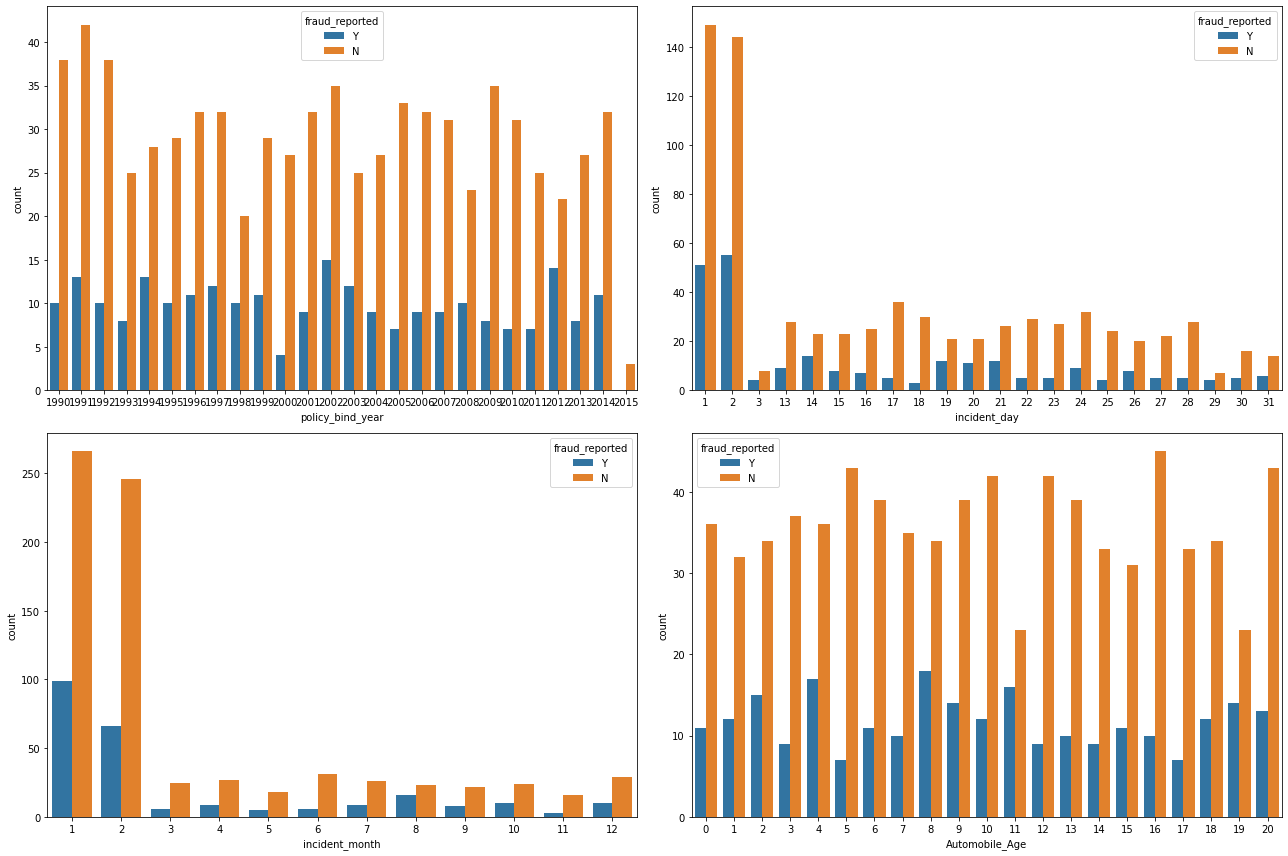

In [76]:
fig,axes=plt.subplots(2,2,figsize=(18,12))

sns.countplot('policy_bind_year',hue="fraud_reported", data= data, ax=axes[0,0])
sns.countplot('incident_day',hue="fraud_reported", data= data, ax=axes[0,1] )
sns.countplot('incident_month',hue="fraud_reported", data= data, ax=axes[1,0] )
sns.countplot('Automobile_Age',hue="fraud_reported", data= data, ax=axes[1,1] )

plt.tight_layout()
plt.show()

Observation: January and February is incident month with maximum.
1st and 2nd are the maximum incident day.

fraud_reported Vs 'csl_1st', 'csl_2nd'

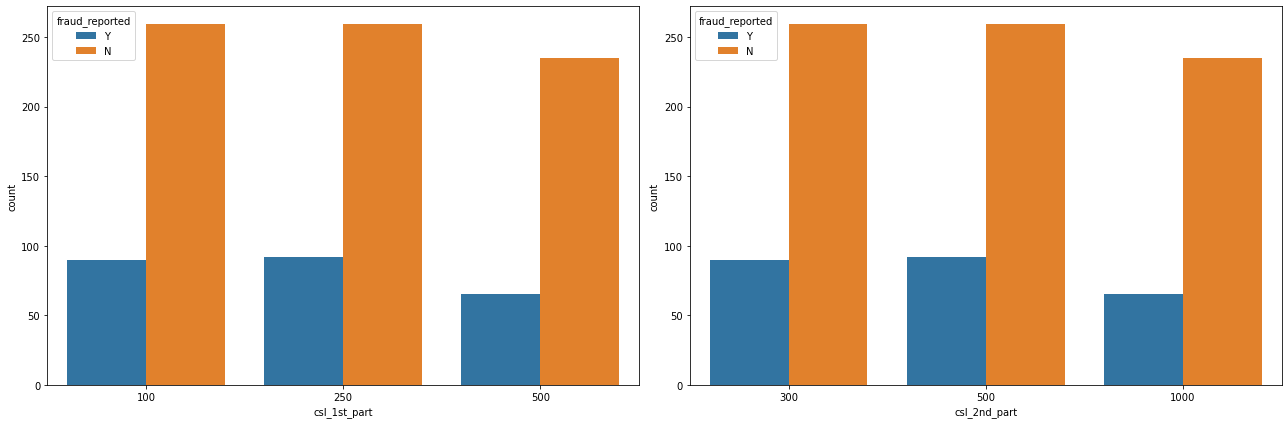

In [77]:
fig,axes=plt.subplots(1,2,figsize=(18,6))
sns.countplot('csl_1st_part',hue="fraud_reported", data= data, ax=axes[0])
sns.countplot('csl_2nd_part',hue="fraud_reported", data= data, ax=axes[1] )
plt.tight_layout()
plt.show()

There is no relation between them.

# Analyzing relation between features

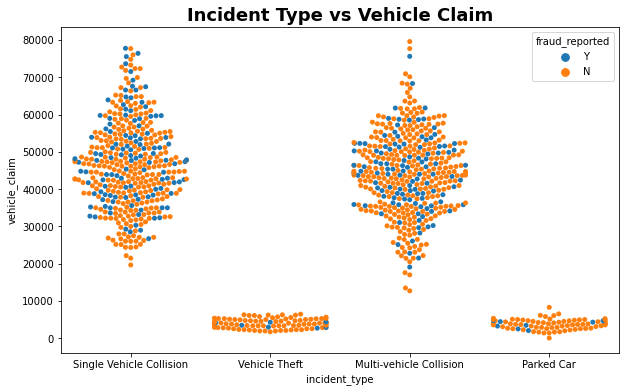

In [78]:
plt.figure(figsize=(10,6))
sns.swarmplot(data['incident_type'], data['vehicle_claim'] ,hue=data["fraud_reported"])
plt.title('Incident Type vs Vehicle Claim',fontsize=18,fontweight ='bold')
plt.show()

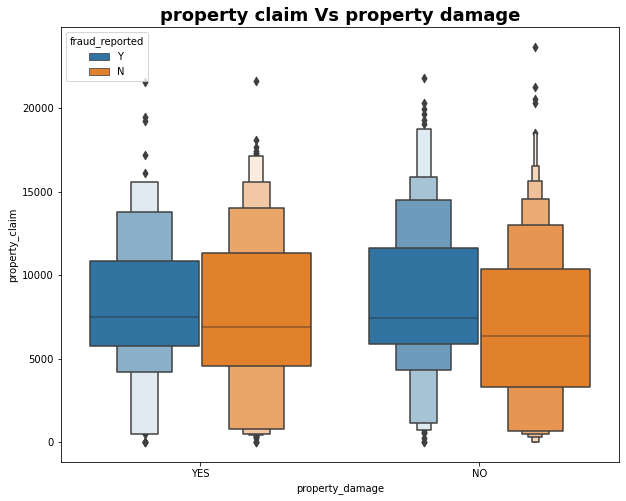

In [79]:
plt.figure(figsize=(10,8))
sns.boxenplot (data['property_damage'],data['property_claim'],hue=data["fraud_reported"])
plt.title('property claim Vs property damage',fontsize=18,fontweight ='bold')
plt.show()

Observation:Single and multi vehicle collision are maximum.
There is no relation between property_claim vs property_damage.

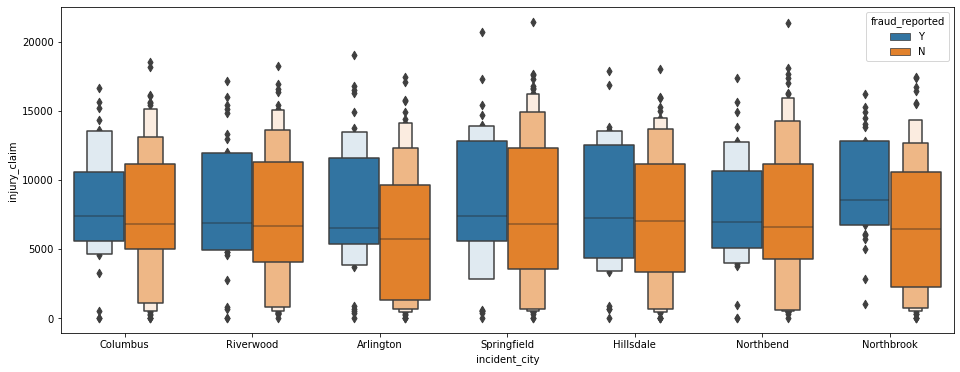

In [80]:
plt.figure(figsize=(16,6))
sns. boxenplot( data['incident_city'], data['injury_claim'], hue=data["fraud_reported"])
plt.show()

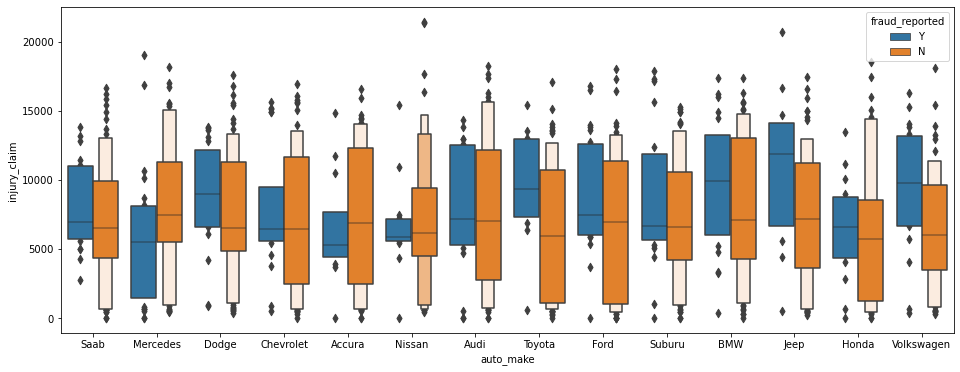

In [81]:
plt.figure(figsize=(16,6))
sns.boxenplot( data['auto_make'], data['injury_claim'],hue=data["fraud_reported"])
plt.show()

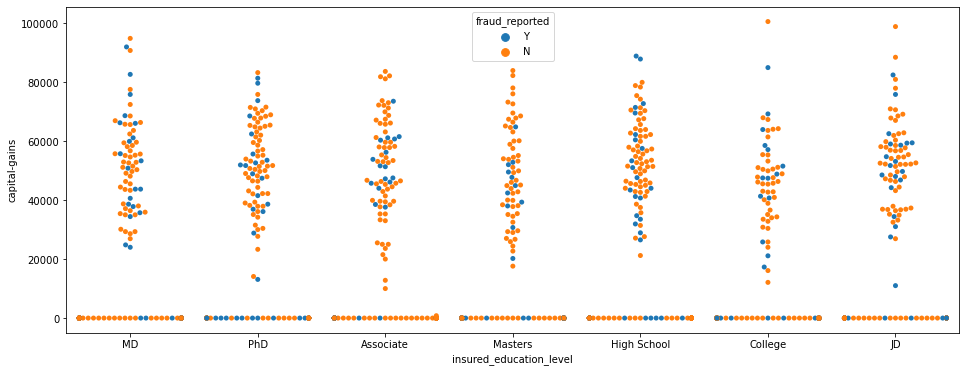

In [82]:
plt.figure(figsize=(16,6))
sns.swarmplot( data['insured_education_level'], data['capital-gains'],hue=data["fraud_reported"])
plt.show()

Observation: Northbrook state reported maximum fraud claims of injury and its is for auto type Jeep.
At education level PhD, fraud is maximum.

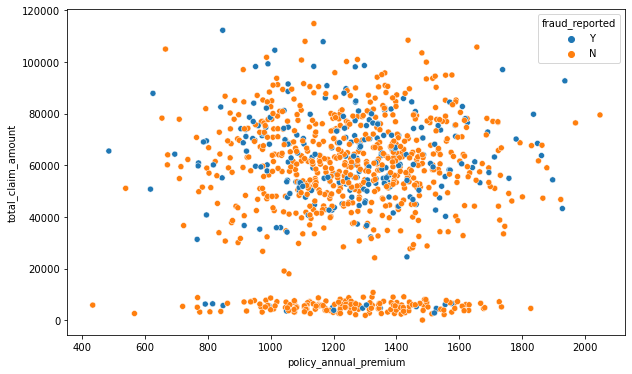

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot( data['policy_annual_premium'], data['total_claim_amount'], hue=data["fraud_reported"])
plt.show()

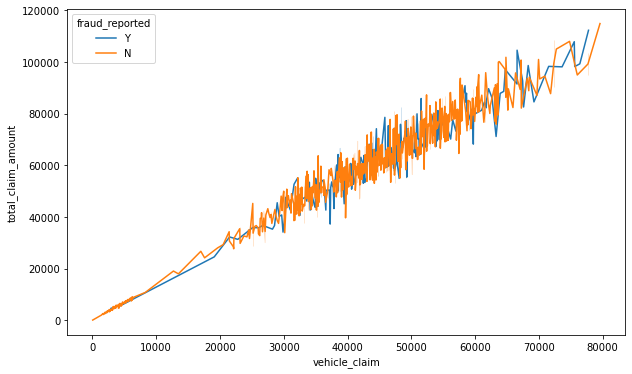

In [84]:
plt.figure(figsize=(10,6))
sns.lineplot( data['vehicle_claim'], data['total_claim_amount'], hue=data["fraud_reported"])
plt.show()

Observation:Total claim and vehicle claim are directly proportional to each other.

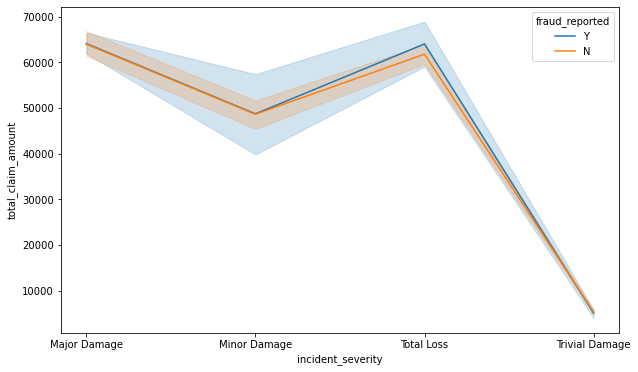

In [85]:
plt.figure(figsize=(10,6))
sns.lineplot( data['incident_severity'], data['total_claim_amount'], hue=data["fraud_reported"])
plt.show()

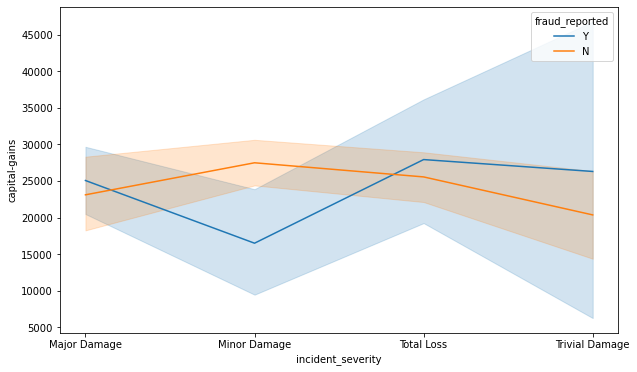

In [86]:
plt.figure(figsize=(10,6))
sns.lineplot( data['incident_severity'], data['capital-gains'], hue=data["fraud_reported"])
plt.show()

Observation:Major damages claims are maximum with high total claim value.

# Pair Plot

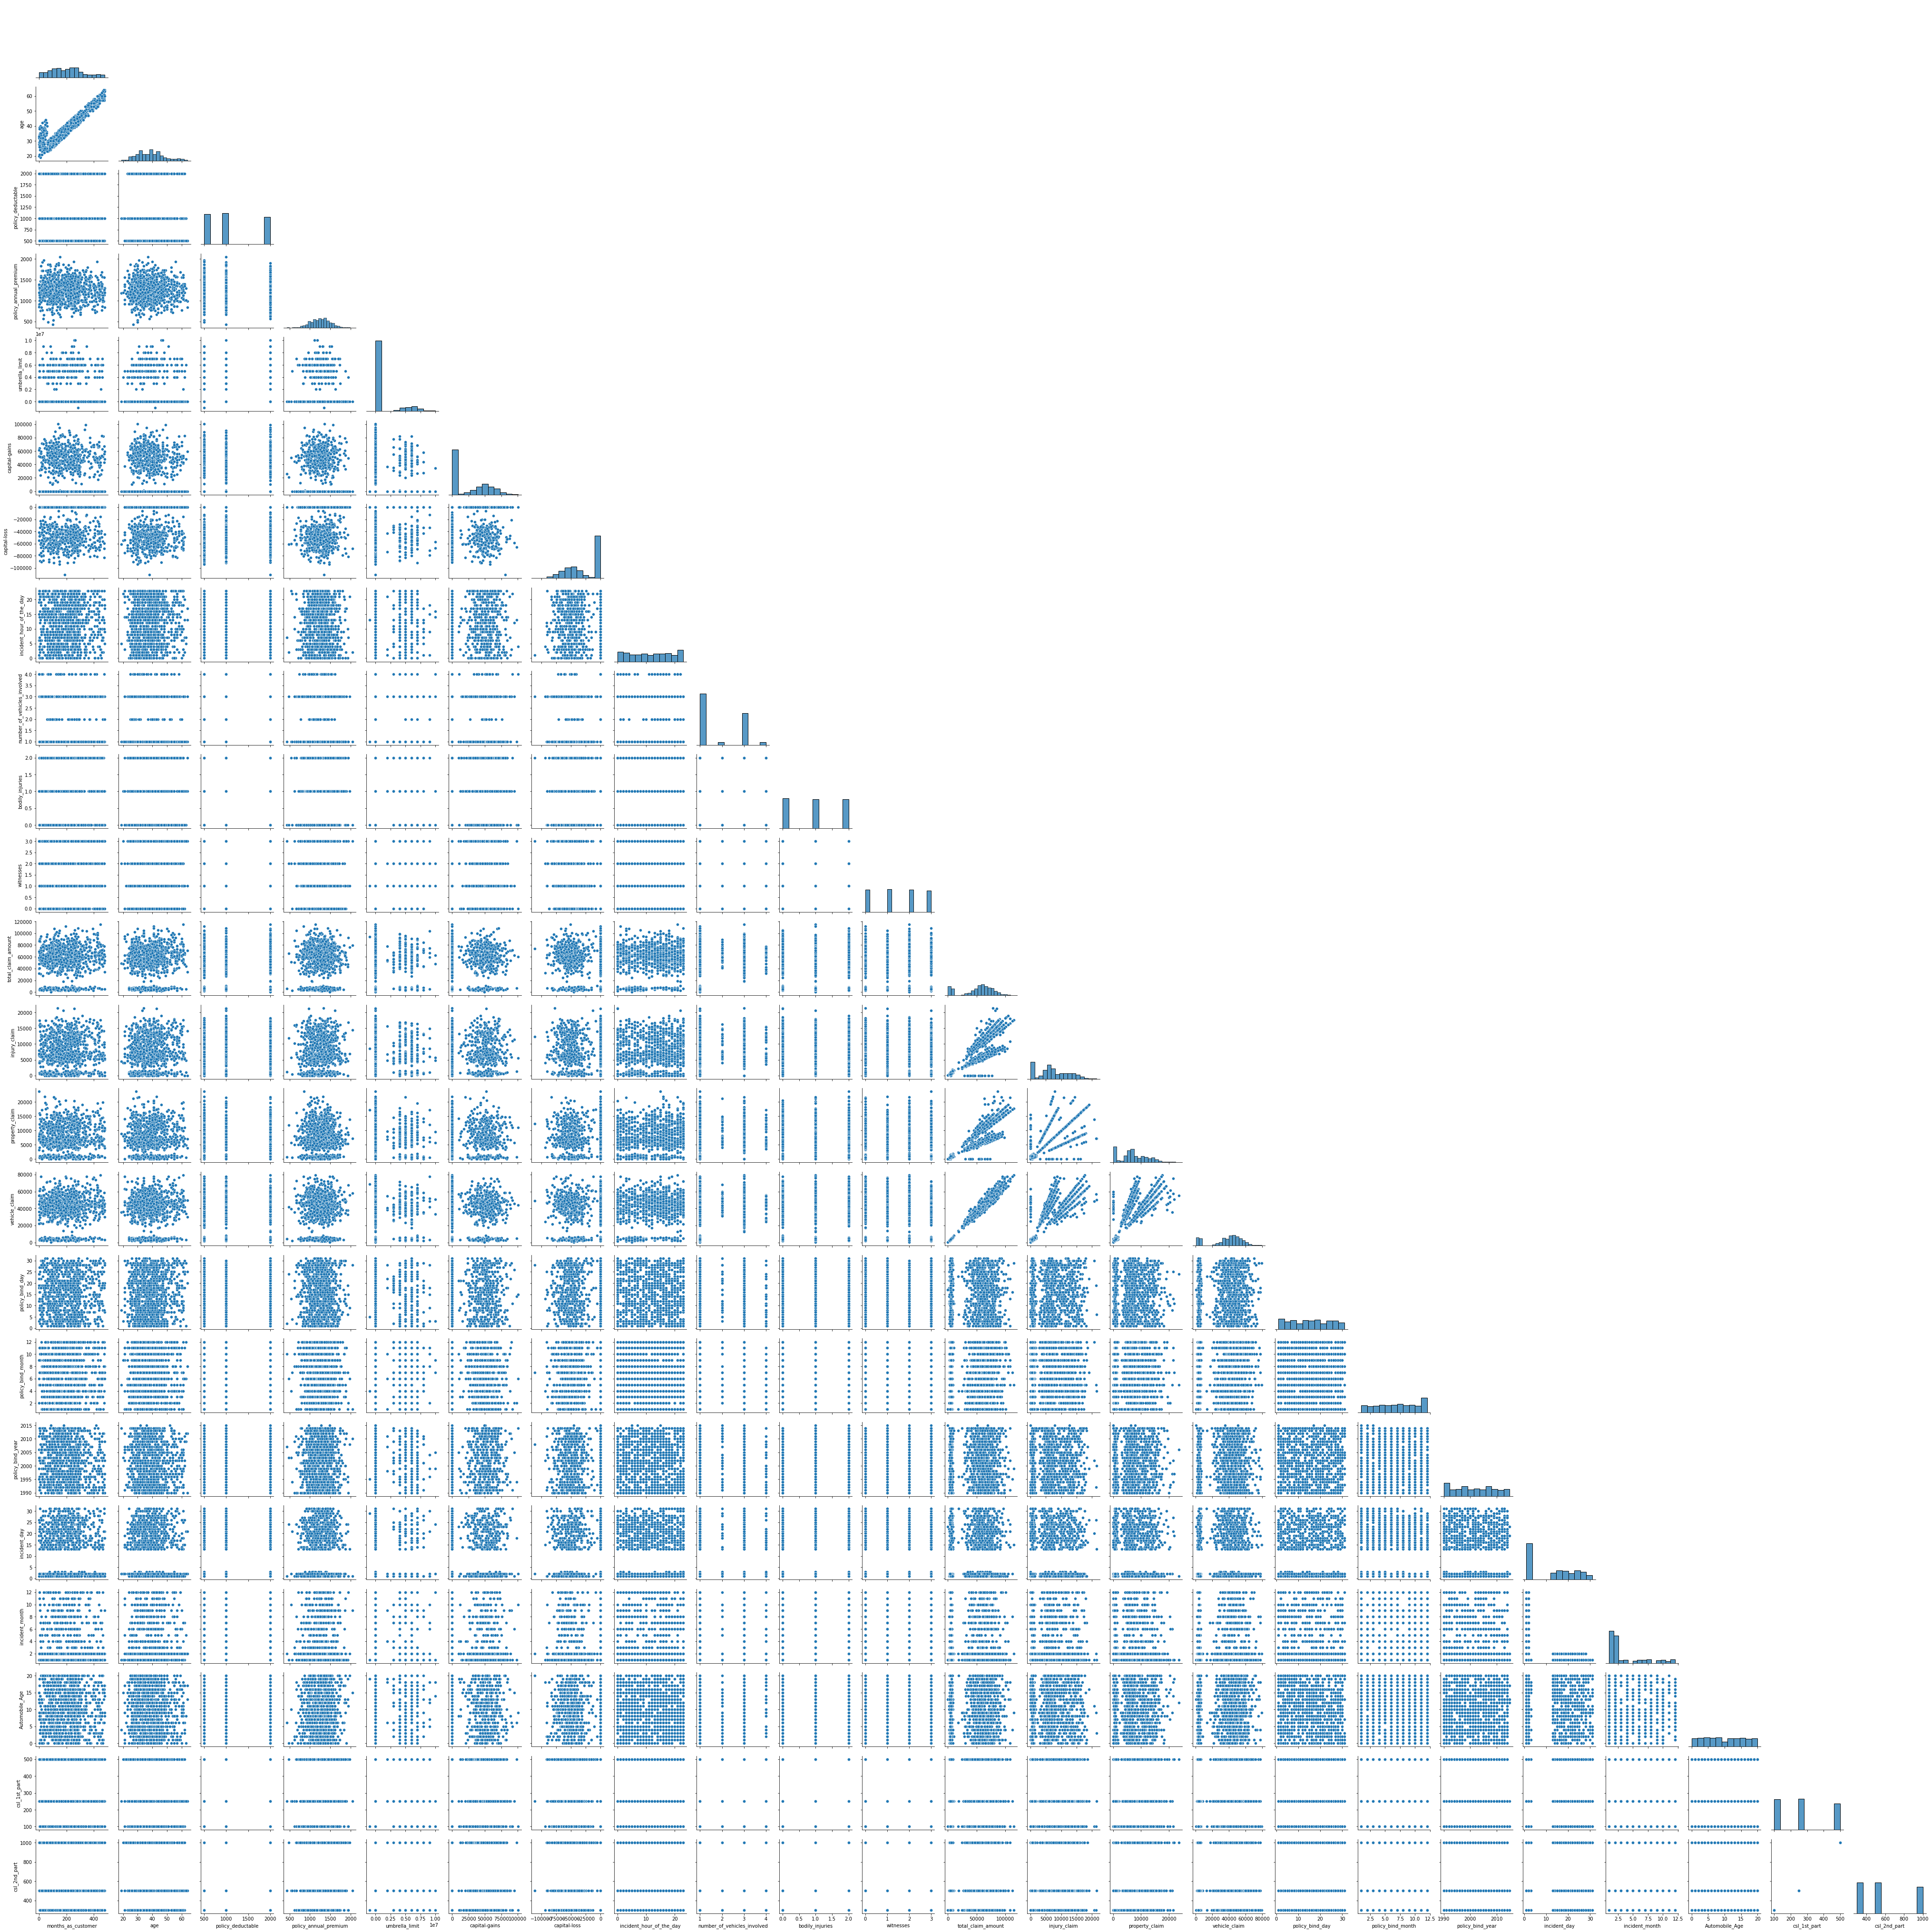

In [87]:
sns.pairplot(data, kind='scatter', corner=True)

# Encoding

Converting Categorical Data

In [88]:
# Using Label Encoder
data[['csl_1st_part', 'csl_2nd_part']]= data[['csl_1st_part', 'csl_2nd_part']].astype(str)


In [89]:
cat_data = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'csl_1st_part', 'csl_2nd_part']


In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_data:
    data[i] = le.fit_transform(data[i])
data.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  ...  \
0                        4                   2               17  ...   
1                        4                   6               15  ...   
2                        6                  11                2  ...   
3                        6                   1                2  ...   
4                        0                  11                2  ...   

   fraud_reported  policy_bind_day  policy_bind_month  policy_bind_year  \
0               1               17                 10              2014   
1               1               27                  6              2006   
2               0                9                  6              2000   
3               1               25                  5              1990   
4               0                6                  6              2014   

   incident_day  incident_month  Automobile_Age  csl_1st_part  csl_2nd_part  \
0            25               1              11             1             2   
1            21               1               8             1             2   
2            22               2               8             0             1   
3             1              10               1             1             2   
4            17               2               6             2             0   

   age_group  
0      41-50  
1      41-50  
2      21-30  
3      41-50  
4      41-50  

[5 rows x 41 columns]

In [91]:
data.drop(['age_group'], axis=1, inplace= True)


# Checking Outliers

In [92]:
num_data = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']


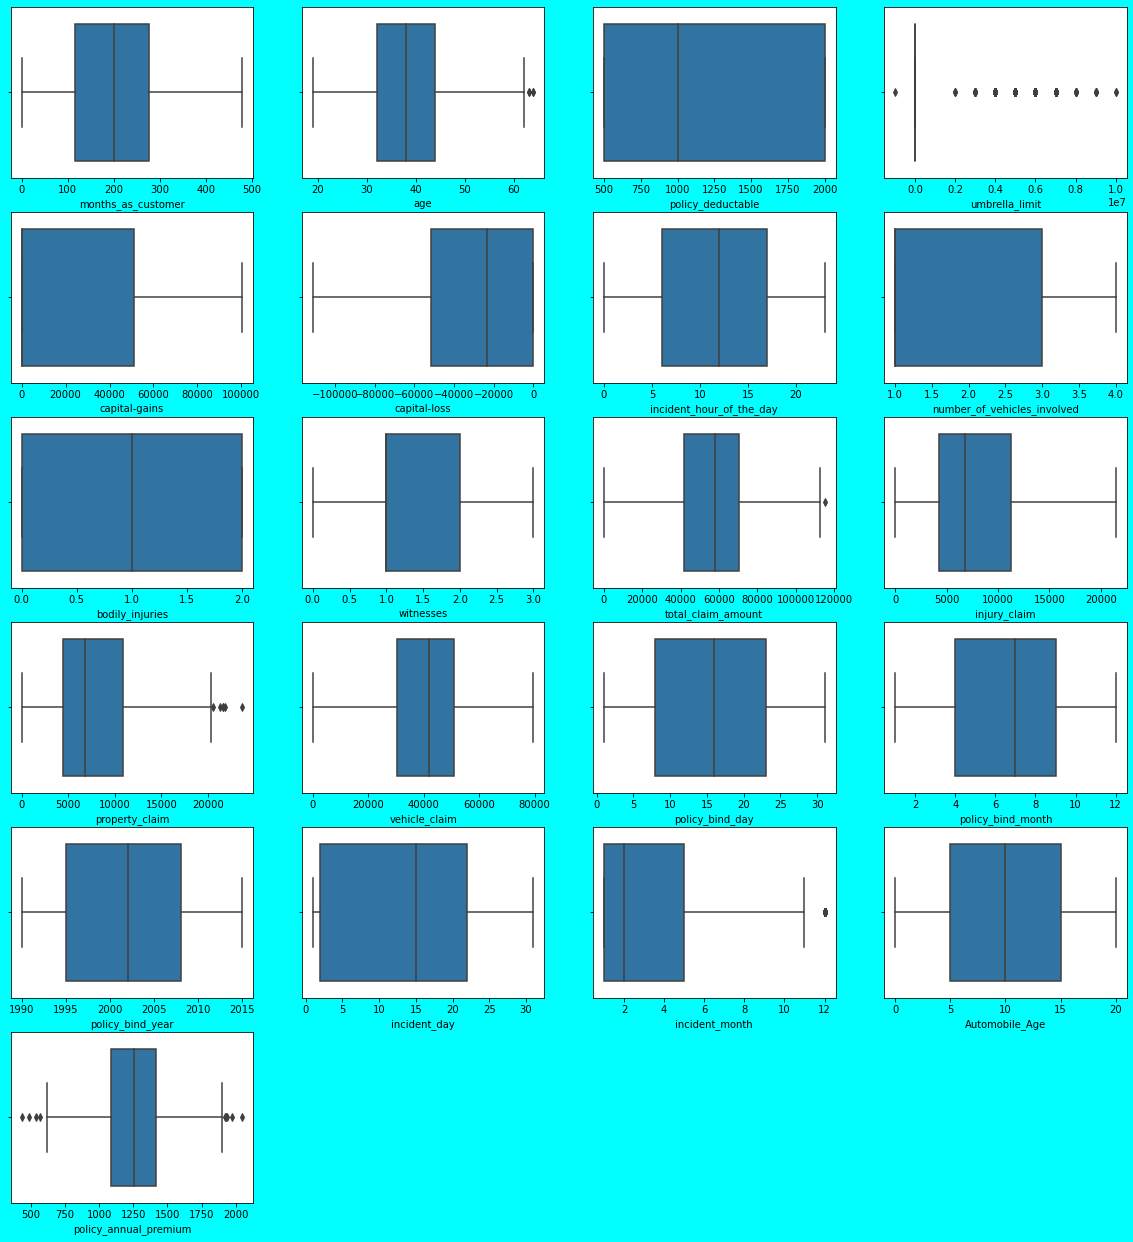

In [93]:
plt.figure(figsize=(20,22),facecolor='cyan')
plotnumber=1
for x in num_data:
    if plotnumber<=21:
        plt.subplot(6,4,plotnumber)
        sns.boxplot(data[x])
        plt.xlabel(x)
    plotnumber+=1
plt.show()

Observation: There are outliers present in dataset.

# Removing Outliers

In [94]:
df= data.copy()

In [95]:
# Using Zscore Method
from scipy.stats import zscore
z = np.abs(zscore(data))
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 27,  5,  5,  5,  4, 12,
        5,  5,  5], dtype=int64))


In [96]:
data1 = data[(z<3).all(axis = 1)]
data1.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  ...  \
0                        4                   2               17  ...   
1                        4                   6               15  ...   
2                        6                  11                2  ...   
3                        6                   1                2  ...   
4                        0                  11                2  ...   

   auto_model  fraud_reported  policy_bind_day  policy_bind_month  \
0           1               1               17                 10   
1          12               1               27                  6   
2          30               0                9                  6   
3          34               1               25                  5   
4          31               0                6                  6   

   policy_bind_year  incident_day  incident_month  Automobile_Age  \
0              2014            25               1              11   
1              2006            21               1               8   
2              2000            22               2               8   
3              1990             1              10               1   
4              2014            17               2               6   

   csl_1st_part  csl_2nd_part  
0             1             2  
1             1             2  
2             0             1  
3             1             2  
4             2             0  

[5 rows x 40 columns]

In [97]:
data.shape

(1000, 40)

In [98]:
# Loss of Data
print ("Percentage of data loss",((data.shape[0]- data1.shape[0])/data.shape[0])*100, "%")


Percentage of data loss 2.0 %


Observation: All outlier removed.

# Correlation Matrix

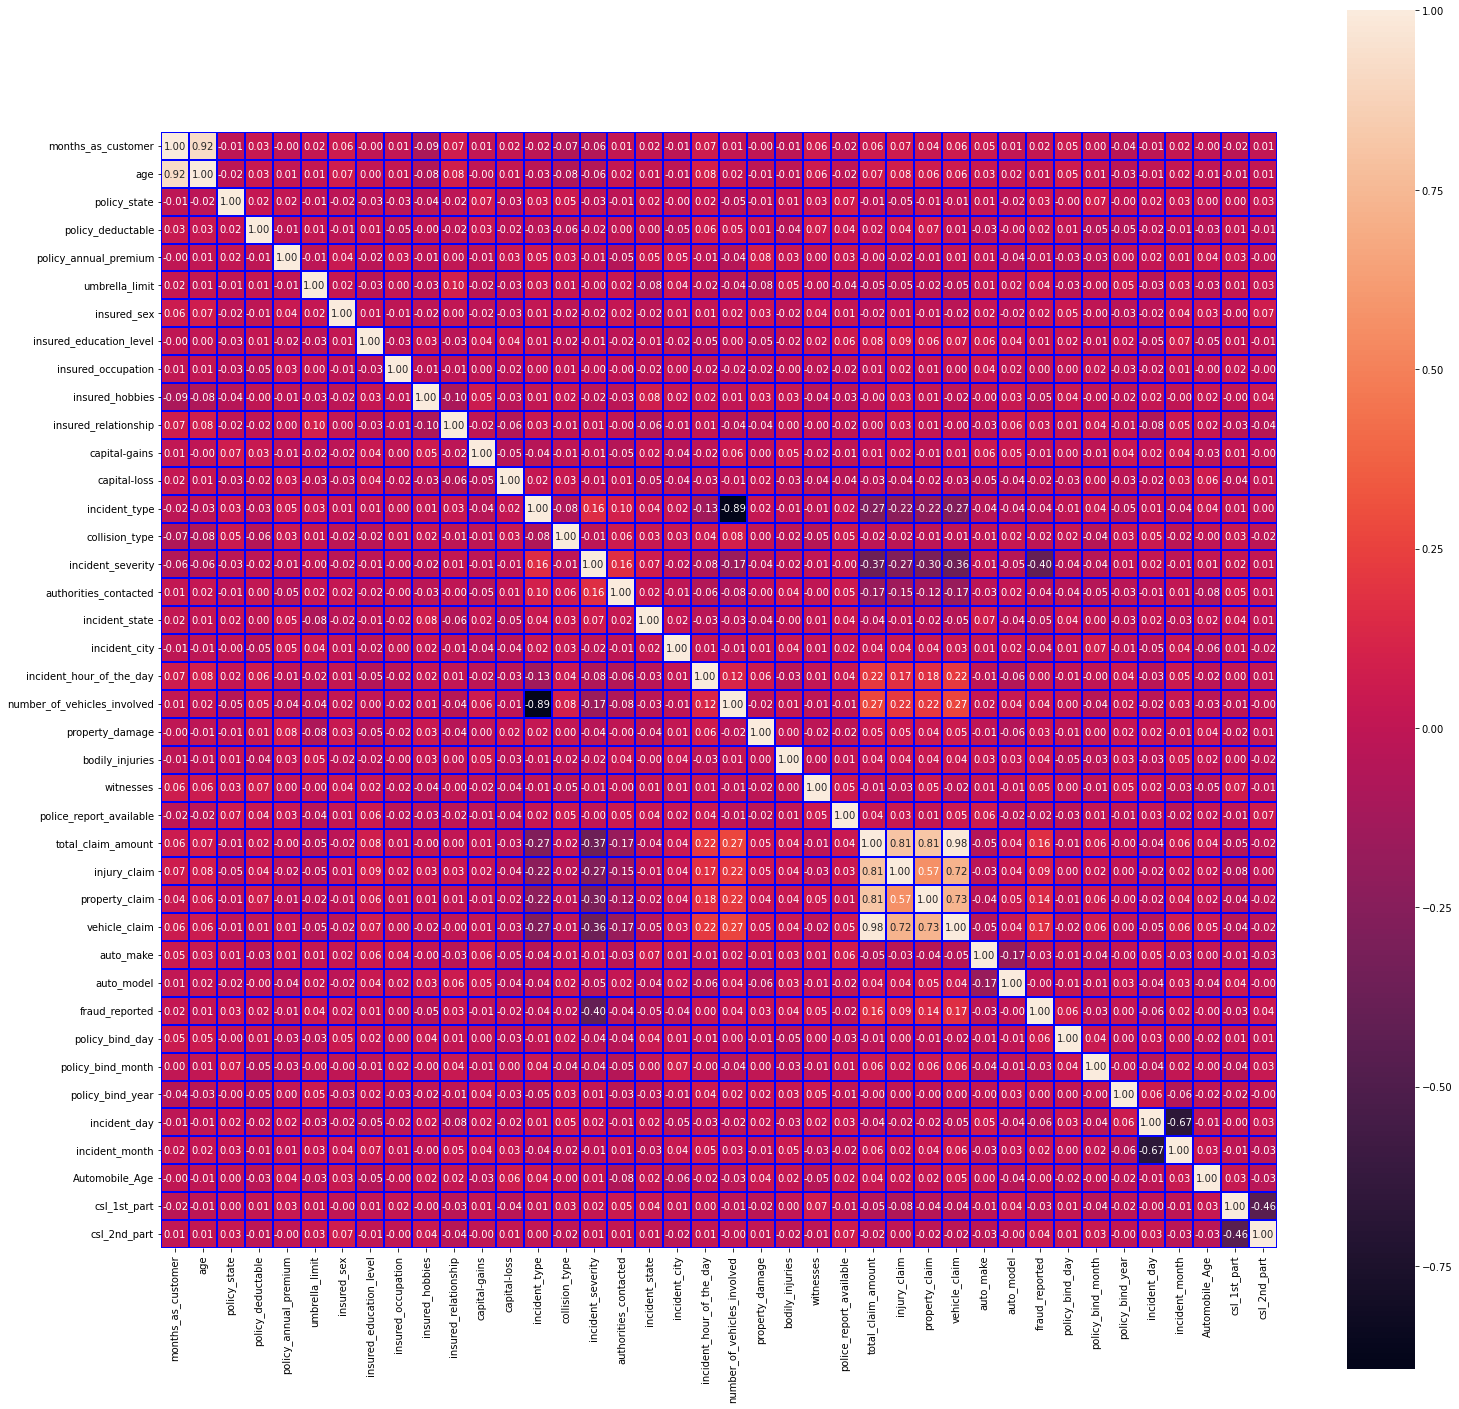

In [99]:
plt.subplots(figsize=(25,25))
sns.heatmap(data1.corr(), annot= True, linecolor= "blue", linewidths= 1.5, square=True, fmt='0.2f')
plt.show()

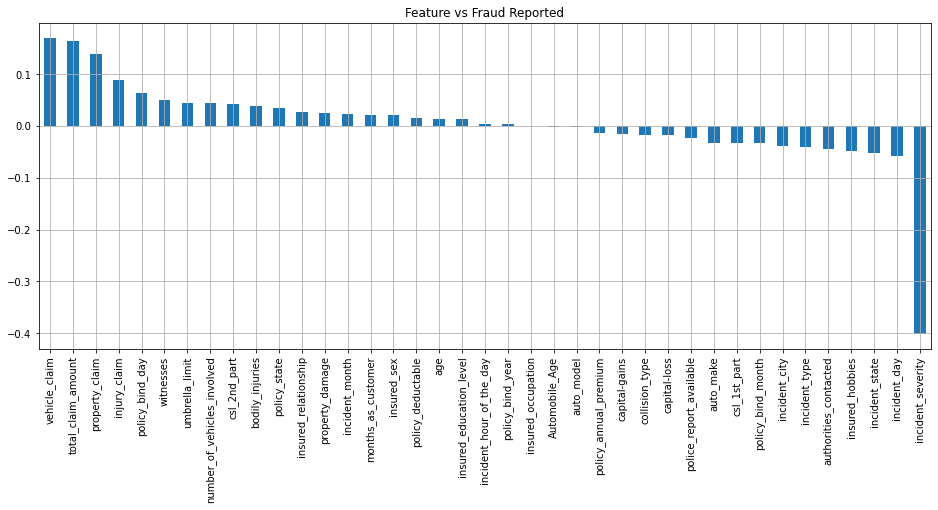

In [100]:
data1.drop("fraud_reported", axis=1).corrwith(data1["fraud_reported"]).sort_values(ascending=False).plot(kind='bar',
        figsize=(16,6),grid='True',title='Feature vs Fraud Reported')
plt.show()

Observation:

Target variable is very less correlated to other variables.

Target variable is highly correlated with incident_severity.

Target is very less correlated with insured_occupation, Automobile_Age and auto_model.

There is high correlation among injury_claim,property_claim,vehicle_claim and total_claim_amount.

no_of_vehicle_involved and incident_type are highly negative correlated with each others.


# Checking Skewness

In [101]:
data1.skew().sort_values()

vehicle_claim                 -0.620936
total_claim_amount            -0.593593
capital-loss                  -0.376884
incident_state                -0.149255
authorities_contacted         -0.114044
csl_2nd_part                  -0.094370
auto_model                    -0.073462
insured_hobbies               -0.061488
insured_occupation            -0.055360
incident_hour_of_the_day      -0.039280
policy_state                  -0.038157
collision_type                -0.032778
auto_make                     -0.028739
policy_bind_month             -0.024643
bodily_injuries                0.003757
insured_education_level        0.006286
witnesses                      0.026211
policy_bind_day                0.028152
policy_annual_premium          0.035964
incident_city                  0.043882
Automobile_Age                 0.054522
incident_day                   0.055443
policy_bind_year               0.065022
insured_relationship           0.078339
incident_type                  0.090563


Observation: Skewness is present in 'umbrella_limit','total_claim_amount','incident_month' and 'vehicle_claim'variables.
'incident_month', 'umbrella_limit'are discrete in nature.

In [102]:
skew_data =['total_claim_amount','vehicle_claim']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

data1[skew_data] = scaler.fit_transform(data1[skew_data].values)
data1[skew_data].skew()

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

Observation: There is no skewness present now.

# Balancing Target

In [103]:
df2= data1.copy()

In [104]:
data1['fraud_reported'].value_counts() 


0    740
1    240
Name: fraud_reported, dtype: int64

In [105]:
# Using SMOTE
from imblearn.over_sampling import SMOTE
over = SMOTE()

# splitting data in target and dependent feature
x = data1.drop(['fraud_reported'], axis =1)
y = data1['fraud_reported']
x,y = over.fit_resample(x,y)
y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

# Multicollinearity

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

VIF                     Features
0      33.764050           months_as_customer
1     155.085421                          age
2       2.467481                 policy_state
3       5.191861            policy_deductable
4      32.003120        policy_annual_premium
5       1.301255               umbrella_limit
6       1.773157                  insured_sex
7       3.521802      insured_education_level
8       4.098605           insured_occupation
9       4.312603              insured_hobbies
10      3.354851         insured_relationship
11      1.932508                capital-gains
12      2.108643                 capital-loss
13      7.609531                incident_type
14      2.874595               collision_type
15      2.539937            incident_severity
16      3.158417        authorities_contacted
17      3.508635               incident_state
18      3.266642                incident_city
19      4.723337     incident_hour_of_the_day
20     16.241489  number_of_vehicles_involved
21      1.384609              property_damage
22      2.448564              bodily_injuries
23      2.947229                    witnesses
24      1.431244      police_report_available
25  37189.608885           total_claim_amount
26   5516.790571                 injury_claim
27   5546.345045               property_claim
28  18436.080177                vehicle_claim
29      4.098038                    auto_make
30      4.745741                   auto_model
31      4.586134              policy_bind_day
32      5.166448            policy_bind_month
33  15183.617437             policy_bind_year
34      4.830125                 incident_day
35      3.964829               incident_month
36      4.123499               Automobile_Age
37      2.650122                 csl_1st_part
38      3.051054                 csl_2nd_part

Observation: There is multicollinearity present in data.

# PCA

In [107]:
x1= x.copy()

In [108]:
# Using Principal Component Analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

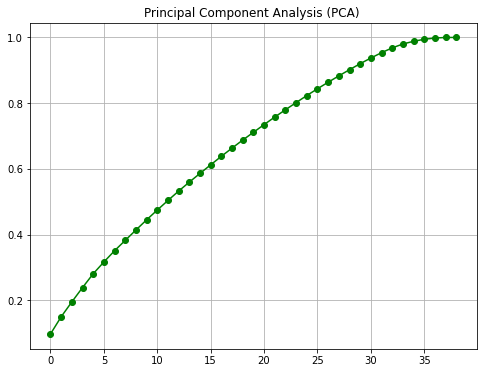

In [109]:
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'go-')
plt.title('Principal Component Analysis (PCA) ')
plt.grid()

Observation: Starting 30 components gives almost 90% variance.Considering them.

In [110]:
pca_new = PCA(n_components=30)
x_scale_new = pca_new.fit_transform(x_scale)
prin_x=pd.DataFrame(x_scale_new )
prin_x.head()

0         1         2         3         4         5         6   \
0  0.230747  0.872269 -2.946090 -1.790939  2.619432 -1.648571 -1.223048   
1 -4.255728  0.467765 -1.282033 -0.343019 -0.499794 -0.332851  0.885821   
2 -1.093668 -1.005726  1.480460 -0.970931 -0.191892  0.332212  1.859215   
3  0.169818  1.484897  0.915422  2.914073 -1.673730  0.723171  2.966666   
4 -3.458553  1.430001  0.071751  0.393699 -1.809092  1.296777  1.169132   

         7         8         9   ...        20        21        22        23  \
0 -1.215778 -0.031847 -0.217321  ...  0.926824  0.001296 -0.526351 -0.120288   
1 -1.323015 -0.408131 -1.027545  ...  1.351472  1.575578 -0.636979  0.581555   
2 -0.026903  0.348570 -1.097471  ... -0.725434  1.063798  0.676892  0.905220   
3 -1.373194  0.796004 -0.686038  ... -0.383179  0.320174 -0.182607 -1.312130   
4  2.690867 -0.329477  2.125633  ...  0.738431  1.012924 -0.902433 -1.365848   

         24        25        26        27        28        29  
0 -0.289928  1.270756  1.612245 -1.896308  0.478645  0.486192  
1 -0.411675 -0.482443 -0.450968 -0.837424  1.300340 -0.706103  
2  1.800326  0.056055 -0.895817 -0.359893  0.098349 -0.463216  
3  1.067419  1.665622  0.937416  0.507031 -0.612855  0.348074  
4 -1.230694 -1.076367  1.630842 -0.656053  0.273039  0.897839  

[5 rows x 30 columns]

# Using different Classification ML Models 

Find Best Random State

In [111]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(500, 2000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
        
print('Best accuracy is', acc_max ,'on Random_state', random_max)


Best accuracy is 0.8297297297297297 on Random_state 1045


Observation: We are getting best accuracy at random state 1045,considering it

In [128]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (1110, 30)
Training target shape: (1110,)
Test feature shape: (370, 30)
Test target shape: (370,)


# Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_scale_new,y,test_size = 0.25, random_state= 1045)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))

accu score :  0.8297297297297297
cof_mat:
  [[140  35]
 [ 28 167]]
classification report:
                precision    recall  f1-score   support

           0       0.83      0.80      0.82       175
           1       0.83      0.86      0.84       195

    accuracy                           0.83       370
   macro avg       0.83      0.83      0.83       370
weighted avg       0.83      0.83      0.83       370

-----------
-----------
training score :  0.7648648648648648
testing score :  0.8297297297297297


Hyperparameter tuning

In [130]:
# Using GridsearchCV

from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag'],penalty=['l2','l1','elasticnet', 'none'], C=[1.0, 0.1,0.01,0.001]
           , max_iter=[100, 140, 80])

grid_log = GridSearchCV(estimator=log, param_grid= grid, cv=5 )

grid_log.fit(x_train, y_train)
print('best params : ', grid_log.best_params_)

best params :  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [131]:
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))

accu score :  0.8162162162162162
cof_mat:

  [[135  40]
 [ 28 167]]
classification report:
                precision    recall  f1-score   support

           0       0.83      0.77      0.80       175
           1       0.81      0.86      0.83       195

    accuracy                           0.82       370
   macro avg       0.82      0.81      0.81       370
weighted avg       0.82      0.82      0.82       370

-----------
-----------
training score :  0.7666666666666667
testing score :  0.8162162162162162


Observation: Accuracy score not improved after using gridsearchCV.

# Decision Tree Classifier

In [132]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.6675675675675675


cof_mat:  [[115  60]
 [ 63 132]]


classification report: 

               precision    recall  f1-score   support

           0       0.65      0.66      0.65       175
           1       0.69      0.68      0.68       195

    accuracy                           0.67       370
   macro avg       0.67      0.67      0.67       370
weighted avg       0.67      0.67      0.67       370

-----------
-----------
training score :  1.0
testing score :  0.6675675675675675


Hyperparameter tuning

In [133]:
# Using GridsearchCV
param = {'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : range(1,4), 'splitter': ["best", "random"], 'ccp_alpha': [0.1, .01, .001, 10,1],
        'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = clf, cv=5, param_grid = param)

grid_search.fit(x_train, y_train)
print('best params : ', grid_search.best_params_)

best params :  {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 2, 'splitter': 'best'}


In [134]:
grid_clf_best = grid_search.best_estimator_
grid_clf_best.fit(x_train, y_train)

y_pred = grid_clf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))

accu score :  0.6594594594594595


cof_mat:  [[142  33]
 [ 93 102]]


classification report: 

               precision    recall  f1-score   support

           0       0.60      0.81      0.69       175
           1       0.76      0.52      0.62       195

    accuracy                           0.66       370
   macro avg       0.68      0.67      0.66       370
weighted avg       0.68      0.66      0.65       370

-----------
-----------
training score :  0.7360360360360361
testing score :  0.6594594594594595


Observation: Accuracy score,training score,testing score decreased after using gridsearhCV.

# Random Forest Classifier

In [135]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

accu score :  0.8486486486486486


cof_mat:  [[151  24]
 [ 32 163]]


classification report:                precision    recall  f1-score   support

           0       0.83      0.86      0.84       175
           1       0.87      0.84      0.85       195

    accuracy                           0.85       370
   macro avg       0.85      0.85      0.85       370
weighted avg       0.85      0.85      0.85       370

-----------
-----------
training score :  1.0
testing score :  0.8486486486486486


Hyperparameter tuning

In [136]:
# Using GridsearchCV

params = {'n_estimators' : [100,80, 140], 'min_samples_leaf': [1,2,3],
          'criterion' : ["gini", "entropy", "log_loss"]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)

rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'log_loss', 'min_samples_leaf': 2, 'n_estimators': 100}


In [121]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))

accu score :  0.845945945945946


cof_mat:  [[158  22]
 [ 35 155]]


classification report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       180
           1       0.88      0.82      0.84       190

    accuracy                           0.85       370
   macro avg       0.85      0.85      0.85       370
weighted avg       0.85      0.85      0.85       370

-----------
-----------
training score :  0.9990990990990991
testing score :  0.845945945945946


Observation: Accuracy score not improved after using gridsearchCV.

# Extra Trees Classifier

In [137]:
from sklearn.ensemble import ExtraTreesClassifier

etc =ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred = etc.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', etc.score(x_train, y_train))
print('testing score : ', etc.score(x_test, y_test))

accu score :  0.8648648648648649


cof_mat:  [[151  24]
 [ 26 169]]


classification report:                precision    recall  f1-score   support

           0       0.85      0.86      0.86       175
           1       0.88      0.87      0.87       195

    accuracy                           0.86       370
   macro avg       0.86      0.86      0.86       370
weighted avg       0.86      0.86      0.86       370

-----------
-----------
training score :  1.0
testing score :  0.8648648648648649


Hyperparameter tuning

In [138]:
# Using GridsearchCV

params = {'n_estimators' : [100,80, 120], 'min_samples_leaf': [1,2,3],
          'criterion' : ["gini", "entropy"]}

etc_grd = GridSearchCV(etc, param_grid = params, cv=5)

etc_grd.fit(x_train, y_train)
print('best params : ', etc_grd.best_params_)

best params :  {'criterion': 'entropy', 'min_samples_leaf': 2, 'n_estimators': 120}


In [139]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.8594594594594595


cof_mat:  [[149  26]
 [ 26 169]]


classification report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       175
           1       0.87      0.87      0.87       195

    accuracy                           0.86       370
   macro avg       0.86      0.86      0.86       370
weighted avg       0.86      0.86      0.86       370

-----------
-----------
training score :  1.0
testing score :  0.8594594594594595


Observation:Accuracy score decreased after using gridsearchCV.

# Gradient Boosting Classifier

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.8162162162162162


cof_mat:  [[140  35]
 [ 33 162]]


classification report: 

               precision    recall  f1-score   support

           0       0.81      0.80      0.80       175
           1       0.82      0.83      0.83       195

    accuracy                           0.82       370
   macro avg       0.82      0.82      0.82       370
weighted avg       0.82      0.82      0.82       370

-----------
-----------
training score :  0.9576576576576576
testing score :  0.8162162162162162


Hyperparameter tuning

In [141]:
# Using GridsearchCV

param= {"min_samples_split" : [2,3],"learning_rate": [0.1,0.01,1.0,0.001], 'loss': ['log_loss', 'deviance', 'exponential'],
        "min_samples_leaf" :[1,2,3], "criterion":['friedman_mse', 'squared_error','mse'] }

grid_gbdt= GridSearchCV (gbdt, param_grid= param,cv=5)

grid_gbdt.fit(x_train, y_train)
print('best params : ', grid_gbdt.best_params_)

best params :  {'criterion': 'squared_error', 'learning_rate': 1.0, 'loss': 'exponential', 'min_samples_leaf': 3, 'min_samples_split': 3}


In [142]:
grid_gbdt_best = grid_gbdt.best_estimator_
grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report:\n\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_gbdt_best.score(x_train, y_train))
print('testing score : ', grid_gbdt_best.score(x_test, y_test))

accu score :  0.8162162162162162


cof_mat:  [[135  40]
 [ 28 167]]


classification report:

                precision    recall  f1-score   support

           0       0.83      0.77      0.80       175
           1       0.81      0.86      0.83       195

    accuracy                           0.82       370
   macro avg       0.82      0.81      0.81       370
weighted avg       0.82      0.82      0.82       370

-----------
-----------
training score :  1.0
testing score :  0.8162162162162162


Observation: Accuracy score not improved after using gridsreachCV.

# SVC('rbf') (Support Vector Classifier)

In [143]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def svmkernel(ker):
    #svc = SVC(kernel = ker )
    pipe = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = ker))])
    
    pipe.fit(x_train, y_train)
    pipe.score(x_train, y_train)
    predsvc = pipe.predict(x_test)
    print('accu score : ', accuracy_score(y_test, predsvc))
    print("\n")
    print ('cof_mat: ', confusion_matrix(y_test, predsvc))
    print("\n")
    print('classification report: \n\n', classification_report(y_test, predsvc))
    
    print("-----------")
    print("-----------")
    
    
    print('training score : ', pipe.score(x_train, y_train))
    print('testing score : ', pipe.score(x_test, y_test))

In [144]:
svmkernel('rbf')

accu score :  0.827027027027027


cof_mat:  [[140  35]
 [ 29 166]]


classification report: 

               precision    recall  f1-score   support

           0       0.83      0.80      0.81       175
           1       0.83      0.85      0.84       195

    accuracy                           0.83       370
   macro avg       0.83      0.83      0.83       370
weighted avg       0.83      0.83      0.83       370

-----------
-----------
training score :  0.9495495495495495
testing score :  0.827027027027027


# SVC ('linear')

In [145]:
svmkernel('linear')

accu score :  0.8297297297297297


cof_mat:  [[142  33]
 [ 30 165]]


classification report: 

               precision    recall  f1-score   support

           0       0.83      0.81      0.82       175
           1       0.83      0.85      0.84       195

    accuracy                           0.83       370
   macro avg       0.83      0.83      0.83       370
weighted avg       0.83      0.83      0.83       370

-----------
-----------
training score :  0.763063063063063
testing score :  0.8297297297297297


# SVC ('poly')

In [147]:
svmkernel('poly')

accu score :  0.7810810810810811


cof_mat:  [[107  68]
 [ 13 182]]


classification report: 

               precision    recall  f1-score   support

           0       0.89      0.61      0.73       175
           1       0.73      0.93      0.82       195

    accuracy                           0.78       370
   macro avg       0.81      0.77      0.77       370
weighted avg       0.81      0.78      0.77       370

-----------
-----------
training score :  0.9036036036036036
testing score :  0.7810810810810811


Observation: SVC('linear') is better.

# Cross Validation

In [148]:
from sklearn.model_selection import cross_val_score
svm_best = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "linear"))])

all_models = [grid_log_best, grid_clf_best, gbdt, grid_rf_best, grid_etc_best, svm_best ]

for i in all_models:
    cvscore = cross_val_score(i, x_scale_new,y, cv =7)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

 Cross Validation Score :  [0.58018868 0.59433962 0.78773585 0.84834123 0.82464455 0.84834123
 0.85308057]

Mean CV Score : 0.7623816762688264

Std deviation : 0.11272995485949974

-----------
-----------
Cross Validation Score of : DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_features='auto')

 Cross Validation Score :  [0.55660377 0.54245283 0.62735849 0.67772512 0.81990521 0.68246445
 0.70616114]

Mean CV Score : 0.6589530026443198

Std deviation : 0.08790032576312816

-----------
-----------
Cross Validation Score of : GradientBoostingClassifier()

 Cross Validation Score :  [0.59433962 0.61792453 0.80660377 0.85781991 0.84834123 0.86255924
 0.88625592]

Mean CV Score : 0.7819777468351196

Std deviation : 0.11354761500950981

-----------
-----------
Cross Validation Score of : RandomForestClassifier(min_samples_leaf=2, n_estimators=80)

 Cross Validation Score :  [0.57075472 

 Observation: Extratree classifier is giving  maximum accuracy with cross validation score.

# Ploting AUC/ROC Curve

In [150]:
grid_log_best.fit(x_train, y_train)
grid_clf_best.fit(x_train, y_train)
gbdt.fit(x_train, y_train)
grid_rf_best.fit(x_train, y_train)
grid_etc_best.fit(x_train, y_train)
svm_best.fit(x_train, y_train)
print ("All model are trained")

All model are trained


In [151]:
grid_log_best.fit(x_test, y_test)
grid_clf_best.fit(x_test, y_test)
gbdt.fit(x_test, y_test)
grid_rf_best.fit(x_test, y_test)
grid_etc_best.fit(x_test, y_test)
svm_best.fit(x_test, y_test)
print ("All model are tested")

All model are tested


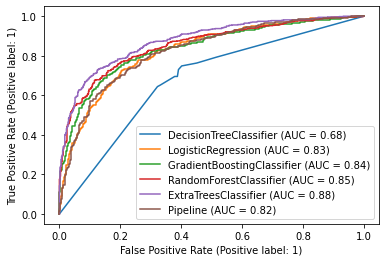

In [152]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(grid_clf_best, x_train, y_train)

plot_roc_curve(grid_log_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(gbdt, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_rf_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_train, y_train, ax=disp.ax_)
plot_roc_curve(svm_best, x_train, y_train, ax=disp.ax_)

plt.show()

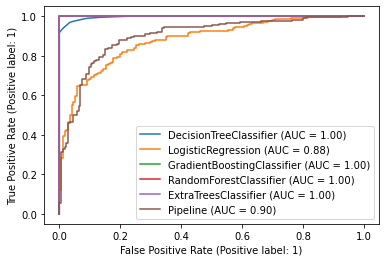

In [153]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(grid_clf_best, x_test, y_test)

plot_roc_curve(grid_log_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gbdt, x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_rf_best,x_test, y_test, ax=disp.ax_)
plot_roc_curve(grid_etc_best, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svm_best,x_test, y_test, ax=disp.ax_)

plt.show()


# Observation: Extratree classifier is having good AUC score, accuracy , cross validation score so this is the best fit model for this dataset.

In [154]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.8783783783783784


cof_mat:  [[155  20]
 [ 25 170]]


classification report: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       175
           1       0.89      0.87      0.88       195

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370

-----------
-----------
training score :  1.0
testing score :  0.8783783783783784


# Confusion Matrix

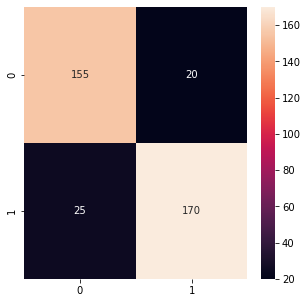

In [155]:
conf = confusion_matrix (y_test, y_pred)

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf, annot = True, fmt = ".0f")
plt.show()

# Saving Model

In [158]:
import pickle
pickle.dump(grid_etc_best, open("Insurance_Fraud_Claim_model", "wb"))
load_Insurance_Fraud_Claim_model= pickle.load(open("Insurance_Fraud_Claim_model", "rb"))


In [160]:
y_pred = load_Insurance_Fraud_Claim_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=5)

Predicted Values  Actual Values
230                 0              0
355                 0              0
216                 0              1
346                 0              0
233                 1              1